Ben Katz

BrainStation DataScience

benkatz21@gmail.com

4/4/2022

# Capstone EDA
This notebook is for exploring the data set I have created. All data has been curated from https://www.transfermarkt.us/ and https://fbref.com/en/. The market values are as of 2/25/2022. The stats are the sum of 2020-2021 season and the 2021-2022 season as of 2/25/2022. I will begin by creating relevant data visualizations. Then I will conduct various statistical tests. In the previous notebook **Capstone Data Scrape**, I go through the process of how I scrape data from https://www.transfermarkt.us/, and explain how the data will be modified in excel to create my final data set. 

In [164]:
#importing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [165]:
#reading in the data
market_values_df = pd.read_excel('data/final capstone data sheet copy.xlsx')

In [166]:
#looking at the first five rows
market_values_df.head()

,Unnamed: 0,Name,League,Club,Position,Age,Nationality,Market Values in Millions,90s,Gls/90,...,Bad Dribbles /90,Rec/90,Rec Success Rate,Fouls Committed/90,Fouls drawn/90,PKs won/90,PKs conceded/90,Loose Balls Recov/90,Aerial Battles Won/90,Aerial Battle Success Rate
0,977,Tom Lacoux,ligue-1,FC Girondins Bordeaux,CM,20,France,0.88,10.8,0.000000,...,2.407407,27.870370,94.952681,2.870370,0.370370,0.000000,0.0,10.370370,0.833333,40.909091
1,396,Kylian Mbappé,ligue-1,Paris Saint-Germain,Centre-Forward,23,France,176.00,49.0,0.836735,...,5.244898,46.755102,75.090134,0.918367,1.693878,0.102041,0.0,3.836735,0.224490,39.285714
2,200,Erling Haaland,bundesliga,Borussia Dortmund,Centre-Forward,21,Norway,165.00,39.4,1.091371,...,3.324873,22.538071,52.451270,0.862944,1.040609,0.000000,0.0,3.451777,1.776650,53.846154
3,1,Romelu Lukaku,premier-league,Chelsea FC,Centre-Forward,28,Belgium,110.00,45.1,0.643016,...,4.456763,26.518847,55.627907,0.953437,1.396896,0.022173,0.0,2.793792,1.596452,42.105263
4,2,Mohamed Salah,premier-league,Liverpool FC,Right Winger,29,Egypt,110.00,57.3,0.715532,...,5.549738,41.815009,66.537073,0.558464,0.907504,0.069808,0.0,5.689354,0.541012,26.956522


In [167]:
#last five rows
market_values_df.tail()

,Unnamed: 0,Name,League,Club,Position,Age,Nationality,Market Values in Millions,90s,Gls/90,...,Bad Dribbles /90,Rec/90,Rec Success Rate,Fouls Committed/90,Fouls drawn/90,PKs won/90,PKs conceded/90,Loose Balls Recov/90,Aerial Battles Won/90,Aerial Battle Success Rate
1489,884,Sidney Raebiger,bundesliga,RB Leipzig,CM,16,Germany,0.825,1.0,0.000000,...,0.000000,1.000000,50.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,NaN
1490,979,Danylo Ihnatenko,ligue-1,FC Girondins Bordeaux,CM,24,Ukraine,0.770,1.0,0.000000,...,0.000000,22.000000,91.666667,0.000000,0.000000,0.0,0.000000,4.000000,0.000000,0.000000
1491,885,Tobias Raschl,bundesliga,SpVgg Greuther Fürth,CM,22,Germany,0.660,1.0,0.000000,...,0.000000,10.000000,100.000000,0.000000,0.000000,0.0,0.000000,3.000000,0.000000,NaN
1492,1451,Pierrick Capelle,ligue-1,SCO Angers,LM,34,France,0.660,30.9,0.097087,...,3.365696,41.165049,86.825939,1.585761,0.679612,0.0,0.064725,9.352751,1.650485,42.857143
1493,1452,Redwan Bourles,ligue-1,FC Lorient,LM,19,France,0.330,1.0,0.000000,...,1.000000,4.000000,57.142857,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [168]:
#random 5 rows
market_values_df.sample(5)

,Unnamed: 0,Name,League,Club,Position,Age,Nationality,Market Values in Millions,90s,Gls/90,...,Bad Dribbles /90,Rec/90,Rec Success Rate,Fouls Committed/90,Fouls drawn/90,PKs won/90,PKs conceded/90,Loose Balls Recov/90,Aerial Battles Won/90,Aerial Battle Success Rate
746,155,Orbelín Pineda,laliga,Celta de Vigo,Left Winger,25,Mexico,9.9,1.0,0.000000,...,4.000000,18.000000,90.000000,0.000000,2.000000,0.000000,0.0,6.000000,0.000000,0.000000
123,115,Gerard Moreno,laliga,Villarreal CF,Centre-Forward,29,Spain,44.0,40.6,0.763547,...,4.605911,42.044335,74.639265,1.477833,2.167488,0.024631,0.0,4.014778,2.216749,50.279330
589,70,Divock Origi,premier-league,Liverpool FC,Centre-Forward,26,Belgium,13.2,2.9,0.689655,...,6.896552,33.793103,60.493827,0.000000,1.034483,0.000000,0.0,6.551724,1.379310,30.769231
70,933,Marco Verratti,ligue-1,Paris Saint-Germain,CM,29,Italy,60.5,29.5,0.067797,...,2.949153,97.084746,94.771674,2.000000,3.152542,0.000000,0.0,9.322034,0.474576,41.176471
142,207,André Silva,bundesliga,RB Leipzig,Centre-Forward,26,Portugal,41.8,47.1,0.785563,...,4.819533,28.004246,50.594553,0.955414,1.443737,0.063694,0.0,4.585987,2.420382,38.000000


Looking at these columns. I need to drop the unnamed column. It represents the excel spreadsheet values in their original form, and they are not necessary for our purposes.

In [169]:
#dropping unnamed collumn
market_values_df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [170]:
#checking out the columns
market_values_df.columns

Index(['Name', 'League', 'Club', 'Position', 'Age', 'Nationality',
       'Market Values in Millions', '90s', 'Gls/90', 'Ast/90', 'PK/90',
       'Non PK Gls/90', 'Yellow Cards/90', 'Red Cards/90', 'xG/90',
       'non PK xG/90', 'xA/90', 'Shots/90', 'Shots on Target/90',
       'Free Kicks/90', 'Passes Cmp', 'Attempts', 'Pass Cmp/90',
       'Pass Cmp Pctg', 'Short Cmp', 'Short Att', 'Short Pass Cmp/90',
       'Short Pass Cmp Pctg', 'Medium Pass Cmp', 'Medium Pass Att',
       'Medium Pass Cmp/90', 'Medium Pass Cmp Pctg', 'Long Pass Cmp/90',
       'Long Pass Cmp Pctg', 'Attacking Passes/90',
       'Successful Box Crosses/90', 'Progressing Passes/90',
       'Through Balls/90', 'Passes under pressure/90', 'Switches/90',
       'Crosses/90', 'Bad Passes/90', 'SCA/90', 'GCA/90', 'Tkl Won/90',
       'Tkl Success Rate', 'Tkl vs Dribbles/90',
       'Tkl vs. dribbles Success Rate', 'Successful Presses/90',
       'Press Success Rate', 'Blocks/90', 'Int/90', 'Clearances/90',
       'Erro

In [171]:
#Finding the shape of the data
print(f'Their are {market_values_df.shape[0]} rows and {market_values_df.shape[1]} columns')

Their are 1494 rows and 73 columns


Note that each row in the dataset represents a player and each column represents something about that player. Most of these columns are soccer statistics combined from the **2020-2021 season** and the **2021-2022 season** As of 2/25/2022. 

## Data Dictionary
Each row in this data set represents a different player.

Each column represents a piece of information about this player. As there are over **60** columns in this data set. I am not going to provide a definition for all variables, but I will list a couple definitions below, as well as the types of statistics available.

### Types of Statistics
* Demographic Information
* Shooting Statistics
* Passisng Statistics
* Dribbling Statistics
* Defensive Statistics
* Other

### A note on the statistics
These stats are from the 2021All of the soccer statistics in this data set are either percentages or on a *per 90 minutes (/90)* played scale. There are **90** minutes played per professional soccer game (kind of, but were not going to get into that now), so essentially all */90* stats represents a players production over the course of a single game. The reason why there are no raw counting stats is because some players in the data set did not play in one of Europe's big 5 leagues in 2020-2021, so there is only one season's worth of data on these players. Using raw counting stats would then create bias, as some players would have more total games represented, and thus higher raw counting stats. However, when the statistics are converted to a */90*, this problem is solved, as all player statistics are on the same scale. Though there is less data on some players, I can assume that the */90* stats are representative of their talent level and market value. 

### Statistics
* / 90 - This means per 90 minutes played. For example, if a player has Goals/90 = 1, that means that this player scores a goal every 90 minutes they play
* Goals
* Ast - Assists
    * Passes that lead directly to goals
* xG - Expected Goals
    * An advanced statistic calculated based on amount and location of shots, as well as the number of defenders in the area when a shot is taken.  
* xA - Expected Assists
    * Same as xG but for assists instead of goals. 
* PK - Penalty Kick Goals
* Non PK Gls - Non Penalty Kick Goals
    * All goals that did not come from penalty kicks. 
* non PK xG - Non Penalty Expected Goals
    * Expected Goals from open play (no penalty kicks)
* PKs won/PKs conceded
    * Penalty kicks a player has earned for their team and penalty kicks a player has given to the opposing team
* SCA - Shot Creating Actions. 
    * Any action that leads directly to a shot
* GCA - Goal Creating Actions. 
    * Any action that leads directly to a goal 
* CrdY/CrdR - Number of yellow/red cards
* Tkls - Tackles on the ball (defensive action)
    * Any attempt to take the ball from an opposing player.
* Mid 3rd Touches 
    * Touches in the middle third of the field
* Att 3rd Touches
    * Touches in the attacking third of the field
* Att Pen Touches 
    * Touches in the opponents penalty area (18 yards from goal) of the field
* Progressive Carries/Passes 
    * Passes or Carries that move the ball at least 10 yards forward
* Bad Passes/Dribbles Passes or Dribbles that lead to the other team getting the ball
* Rec - Pass Receptions
* Int - Pass Interceptions
* Through Balls 
    * a pass that is kicked forward between an opposing team's defenders.
* Errors 
    * Defensive Errors
* Clearances 
    * Clearances out of your penalty ares
* Aerial Battle 
    * A battle for a ball in the air. The player who gets their head on it wins the battle. The success rate measures the percentage of aerial battles a player wins. 
* Success Rate/Win rate/Comp Pctg
    * The ratio of successful actions to total actions. All given in percent form
        * A pass completion pctg of 80 means 80% of passes from this given player were successful. 
        

### Jargon
* Pitch - The soccer field
* Wings - The left and right side of the pitch. 
* Penalty Area - The box right in front of goal. It goes 18 yards in every direction from the goal. 


## Checking for nulls
There were some null values but they were dealt with in excel. They were all in success rate statistics. If a player had not attempted an action, I would receive a divided by 0 error. I replaced these nulls with zeroes, because if they had not attempted an action, than their were not going to have any successful attempts. 

In [172]:
#checking for nulls
market_values_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name                           1494 non-null   object 
 1   League                         1494 non-null   object 
 2   Club                           1494 non-null   object 
 3   Position                       1494 non-null   object 
 4   Age                            1494 non-null   int64  
 5   Nationality                    1494 non-null   object 
 6   Market Values in Millions      1494 non-null   float64
 7   90s                            1494 non-null   float64
 8   Gls/90                         1494 non-null   float64
 9   Ast/90                         1494 non-null   float64
 10  PK/90                          1494 non-null   float64
 11  Non PK Gls/90                  1494 non-null   float64
 12  Yellow Cards/90                1494 non-null   f

# Target Variable Analysis
The target variable for this analysis is `Market Values in Millions`. In this section I will explore the distribution of `Market Values in Millions`, as well compare market values across different leagues and positions. I will run statistical tests to determine if I can conclude a real difference between between a given set 

## `Market Values in Millions` Summary Statistics & Shape. 
I will start by looking at the basic summary statistics, then plotting a histogram and box plot of this data. 

In [173]:
#descriptive statistics of market values
market_values_df['Market Values in Millions'].describe()

count    1494.000000
mean       17.031335
std        18.964263
min         0.330000
25%         4.950000
50%         9.900000
75%        22.000000
max       176.000000
Name: Market Values in Millions, dtype: float64

The average is much higher than the median, which means the data is being skewed by a few players who are valued at a very high number. The range of the final 25% of the data points in the `Market Values in Millions` is 7 times larger than the range of the first 75% of the data. This further suggests that there will be outliers on the high end of the value scale. Let's visualize this with a box plot.

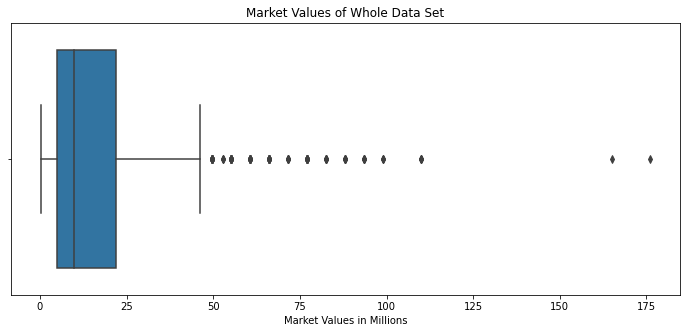

In [174]:
#market values box plot
plt.figure(figsize=(12,5))
sns.boxplot(data=market_values_df, x = 'Market Values in Millions')
plt.title('Market Values of Whole Data Set')
plt.show()

In [175]:
outliers = (market_values_df['Market Values in Millions'] >= 45).sum()
outlier_pctg = round(outliers / 1500 * 100, 2)

print(f'There are {outliers} according to the above boxplot.')
print(f'that represents {outlier_pctg}% of the data set')

There are 111 according to the above boxplot.
that represents 7.4% of the data set


The box plot shows the same as the summary statistics. There is a small amount of data at the high end of the valuation scale. There are around 111 outliers according to the box plot above, which represents a not insignificant 7.4% of the data set. This might cause an issue when it comes to modelling. Now, I will examine the distribution, through a histogram.

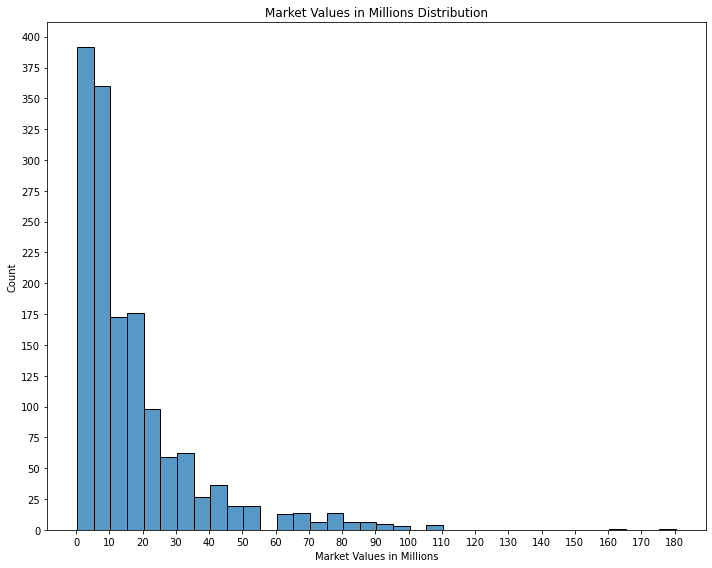

In [176]:


plt.figure(figsize=(10,8))
sns.histplot(data = market_values_df, x = 'Market Values in Millions', binwidth = 5)
# plt.title('Market Values in Millions Distribution')
# plt.xlabel('Market Values in Millions')
# plt.ylabel('Frequency')
# plt.xticks(list(range(0,190, 10)))
plt.title('Market Values in Millions Distribution')
plt.xticks(list(range(0, 181, 10)))
plt.yticks(list(range(0, 401, 25)))
plt.tight_layout()
plt.show()

Each bin on the hitogram above represents a 5 million range. The majority of players are valued at less than 10 million dollars. This histogram shows a series of deep drops every 10 or 15 million dollars. The first being at 10 million, then at 20 then again at 35 and 45 million.  After 35 million dollars, the number of players in a bin does not surpass 50 total players again, and past 45 million, there are no bins greater than 25 players in size. Theres a steady decline from 60-100 million. I'm curious to find out who those two players are all the way to the right. 

In [177]:
market_values_df[market_values_df['Market Values in Millions'] >= 150]

,Name,League,Club,Position,Age,Nationality,Market Values in Millions,90s,Gls/90,Ast/90,...,Bad Dribbles /90,Rec/90,Rec Success Rate,Fouls Committed/90,Fouls drawn/90,PKs won/90,PKs conceded/90,Loose Balls Recov/90,Aerial Battles Won/90,Aerial Battle Success Rate
1,Kylian Mbappé,ligue-1,Paris Saint-Germain,Centre-Forward,23,France,176.0,49.0,0.836735,0.367347,...,5.244898,46.755102,75.090134,0.918367,1.693878,0.102041,0.0,3.836735,0.22449,39.285714
2,Erling Haaland,bundesliga,Borussia Dortmund,Centre-Forward,21,Norway,165.0,39.4,1.091371,0.304569,...,3.324873,22.538071,52.451270,0.862944,1.040609,0.000000,0.0,3.451777,1.77665,53.846154


Above are Erling Haaland and Kylian Mbappé, the two highest valued players in the data set. They are both young strikers who are producing for elite clubs. They are, respsectively, worth at least $55 and $66 million dollars more than the next highest player. Let's look at the other players worth over 100 million dolalrs.

In [178]:
market_values_df[market_values_df['Market Values in Millions'] >= 110]

,Name,League,Club,Position,Age,Nationality,Market Values in Millions,90s,Gls/90,Ast/90,...,Bad Dribbles /90,Rec/90,Rec Success Rate,Fouls Committed/90,Fouls drawn/90,PKs won/90,PKs conceded/90,Loose Balls Recov/90,Aerial Battles Won/90,Aerial Battle Success Rate
1,Kylian Mbappé,ligue-1,Paris Saint-Germain,Centre-Forward,23,France,176.0,49.0,0.836735,0.367347,...,5.244898,46.755102,75.090134,0.918367,1.693878,0.102041,0.000000,3.836735,0.224490,39.285714
2,Erling Haaland,bundesliga,Borussia Dortmund,Centre-Forward,21,Norway,165.0,39.4,1.091371,0.304569,...,3.324873,22.538071,52.451270,0.862944,1.040609,0.000000,0.000000,3.451777,1.776650,53.846154
3,Romelu Lukaku,premier-league,Chelsea FC,Centre-Forward,28,Belgium,110.0,45.1,0.643016,0.243902,...,4.456763,26.518847,55.627907,0.953437,1.396896,0.022173,0.000000,2.793792,1.596452,42.105263
4,Mohamed Salah,premier-league,Liverpool FC,Right Winger,29,Egypt,110.0,57.3,0.715532,0.261780,...,5.549738,41.815009,66.537073,0.558464,0.907504,0.069808,0.000000,5.689354,0.541012,26.956522
5,Harry Kane,premier-league,Tottenham Hotspur,Centre-Forward,28,England,110.0,57.1,0.542907,0.297723,...,4.168126,30.945709,60.389610,1.033275,1.873905,0.035026,0.000000,4.325744,2.732049,43.454039
6,Vinicius Júnior,laliga,Real Madrid,Left Winger,21,Brazil,110.0,43.5,0.367816,0.206897,...,4.965517,46.712644,80.347964,1.172414,2.873563,0.068966,0.022989,4.712644,0.183908,20.512821


All attackers below the age of 30, three of whom are below the age of 24. It is interesting that they are all attacking players. I wonder if this is a bellweather for the rest of the data set. This serves as a good transition to market values by positions.

## `Market Values in Millions` and Position

Now that I have a general idea of the shape and scope of the target varaible `Market Values in Millions`, it is time to dig a little bit deeper. In this section I will explore the distribution and shape of market value by `Position`, `Position Group`, and `Position Subgroup`. The latter two columns have not been created yet, but I will explain how and why I will group players below. I wil use plots to explore the data, and also conduct hypothesis tests to see if there is any significant differences in market value across these three columns. First, lets take a look the positions in the dataset. 

In [179]:
unique_positions = market_values_df['Position'].nunique()
print(f'There are {unique_positions} different positions in the data set. They are shown below.')
for position in market_values_df['Position'].unique():
    print(position)

There are 12 different positions in the data set. They are shown below.
CM
Centre-Forward
Right Winger
Left Winger
CAM
CDM
RB
CB
LB
RM
Second Striker
LM


### Where are the Keepers
Above are all of the 12 different positions that we have in our data set. There is one position that is missing: goalkeeper. There are three reasons why there are no keepers in this dataset. There are not that many of them, as most teams only employ two goalkeepers. Second, there is not a lot of data for half of those keepers, as only one keeper starts the majority of games for each team. Third, the role of the goalkeeper is so different from the rest of the players on the field that it did not seem purposeful to include them in the dataset. It would just introducing noise. It would be akin to analyzing the roles of servers and the roles of chefs at a fine dining establishment. Sure, they work at the same place, but the two roles require vastly different skill sets. 


I'm going to make some cosmetic changes. I'm going to change the position label for Center-Forward, right winger, left winger, and second striker to CF, RW, LW, and ST. Again, this is purely cosmetic, just so there is a two letter code for each position. These position categories will be updated again later for functional reasons shortly. 

In [180]:
#creating all 2 letter codes for position groups
market_values_df["Position"].replace({"Centre-Forward": "CF",
                                      "Second Striker": "ST",
                                      "Left Winger":"LW",
                                      "Right Winger":"RW"}, inplace=True)


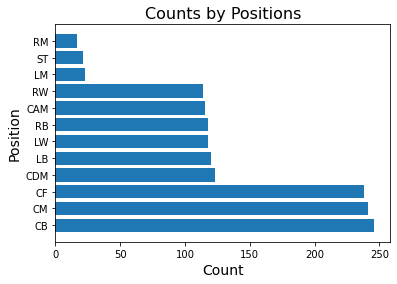

In [181]:
#plotting value counts
plt.figure()
plt.barh(market_values_df['Position'].value_counts().index,
        market_values_df['Position'].value_counts().values)
plt.title('Counts by Positions', fontsize = 16)
plt.ylabel('Position', fontsize = 14)
plt.xlabel('Count', fontsize = 14)
plt.show()

As you can see there are much more CB CM and CFs in the data set than any other position. This is not an issue, and the reason why will be explained after the `Position Group` and `Position Subgroup` columns are created. The big problem here is the low number of RMs and LMs. Second strikers having a small value count does not matter, they play the same role as center forwards do. Now let's look at the spread of the `Market Values` for each of these positions

### Market Value By Position

<function matplotlib.pyplot.show(close=None, block=None)>

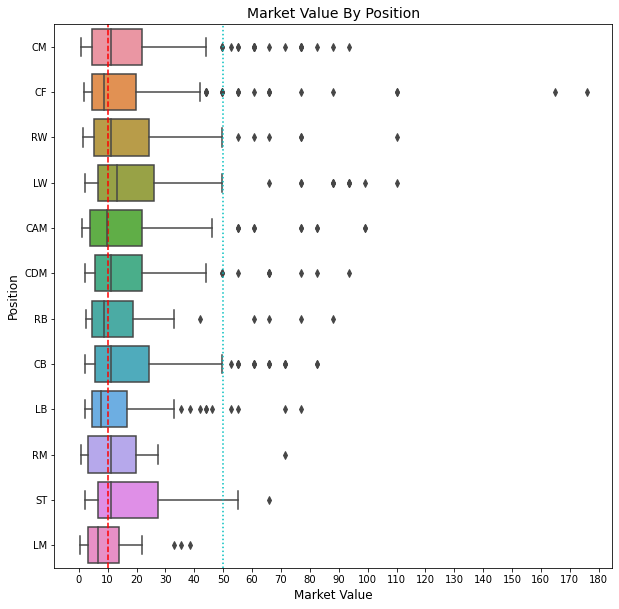

In [182]:
#plotting  market value by positiong
plt.figure(figsize=(10, 10))
#box plot by positiong
sns.boxplot(y = 'Position',
            x = 'Market Values in Millions',
            data = market_values_df,)
plt.title('Market Value By Position', fontsize = 14)
plt.ylabel('Position', fontsize = 12)
plt.xlabel('Market Value', fontsize = 12)
plt.xticks(list(range(0,181, 10)))
#median line
plt.axvline(x = 10, color = 'r', ls = '--')
#outlier line
plt.axvline(x = 50, color = 'c', ls = ':')
plt.show

**Notes on the Plot Above**

1) The medians for each position are relatively in line with each other at the 10 million dollar line. It appears as though LMs have the smallest median. They also are one of the smallest position groups. LWs have the median market value farthest from 10 million dollar line. This is strange as they play a very similar role to LMs.

2) Again we see that only attackers have points above 100 million dollar threshold. However, past the 50 million dollar line, we see a good mix across all positions. Only LMs have no players valued above 50 million dollars, and RMs are the only position with just one player valued above 50 million dollars. 


We will examine the average values by position once they are broken down into `Position Group` and `Position Subgroup`

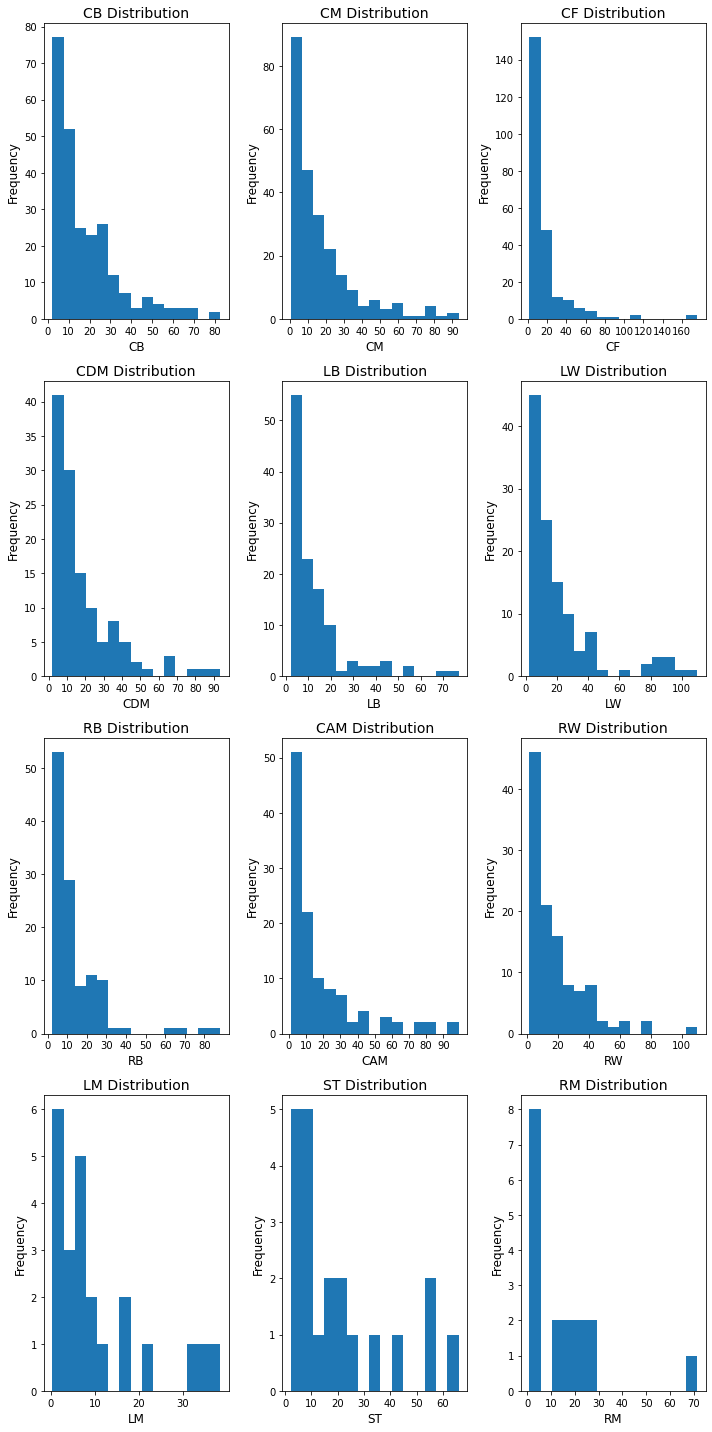

In [183]:
#histogram of market values by position
#grid
plt.subplots(4, 3, figsize = (10,20))

#creating positions list
positions_list = list(market_values_df['Position'].value_counts().index)

#looping through
for i in range(0, len(positions_list)):
    
    #postion specific data
    df = market_values_df[market_values_df['Position'] == positions_list[i]]
    
    #assigning to grid
    plt.subplot(4, 3, i+1)
    
    #histogram
    plt.hist(df['Market Values in Millions'], bins = 15)
    
    #plot details
    title = positions_list[i] + ' Distribution'
    plt.title(title, fontsize = 14)
    plt.xlabel(positions_list[i], fontsize = 12)
    plt.ylabel('Frequency', fontsize = 12)
    max_value = np.amax(df['Market Values in Millions'])
    #setting unique max value lines
    if max_value < 100:
        plt.xticks(list(range(0, int(max_value), 10)))
    else:
        plt.xticks(list(range(0, int(max_value), 20)))
    
plt.tight_layout()
plt.show()
    
    

All positions have a relatively similar distribution to the population set as a whole: skewed left, with most of the valuations coming in at less than 20 million dollars. The last three histograms are not very helpful, as there are less than 25 total players under all of these positions. More will be revealed about these positions when they are grouped shortly.

### Statistical Tests - ANOVA for Positions

#### A note on hypothesis tests in this notebook
I will be running 7 hypothesis tests in this notebook. To avoid p-hacking, I am going to use the Bonferroni Correction. This will decrease the threshold for statistical significance in the notebook to 0.00714. I arrived at this number by dividing the standard significance threshold, 0.05, by the number of tests run in this notebook. 

Since the ANOVA is based on the average value of specific groups, I want to look at the average value by position of these groups before running the test. 

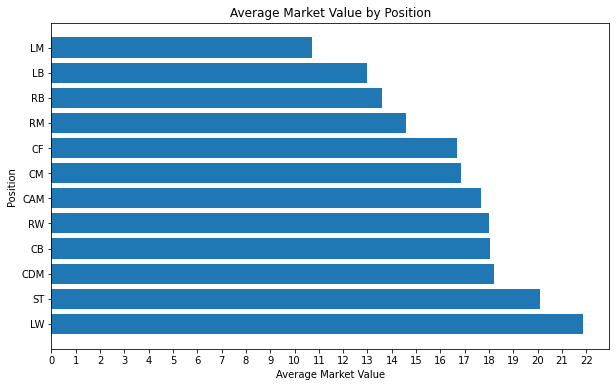

In [184]:
#pulling averages
position_avg = market_values_df.groupby('Position').mean()['Market Values in Millions']

#sorting values
position_avg_sorted = position_avg.sort_values(ascending=False)

#graphing
plt.figure(figsize=(10, 6))
plt.barh(position_avg_sorted.index, position_avg_sorted.values)
plt.ylabel('Position')
plt.xlabel('Average Market Value')
plt.title('Average Market Value by Position')
plt.xticks(range(0,23))
plt.show()

We can see that ST and LW have the highest market values, and are the only positions with average market values above 20 million. There is a steep drop from CM to RM, and another steep drop from the second lowest average, LB, to the lowest average LM. In general, midfielders and defenders who play on the wings appear to be less valuable than the other positions. Now I can run the ANOVA.

**Null Hypothesis: There is no difference in means across positions**

**Alternative Hypothesis: There is a difference in means across positions**

In [185]:
#creating anova dict and unique positions list
anova_data = {}
positions = market_values_df["Position"].unique()

# slice out the time spent for each position
for position in positions:
    anova_data[position] = market_values_df.loc[market_values_df["Position"] == position, "Market Values in Millions"]

In [186]:
#importing stats
from scipy import stats

#running anova
f_stat_anova, p_value_anova = stats.f_oneway(anova_data["CM"], 
                                             anova_data["CF"], 
                                             anova_data["RW"],
                                             anova_data["LW"], 
                                             anova_data["CAM"],
                                             anova_data["CDM"], 
                                             anova_data["CB"], 
                                             anova_data["RB"],
                                             anova_data["LB"], 
                                             anova_data["RM"],
                                             anova_data["LM"], 
                                             anova_data["ST"])

#printing results
print(f"F statistic: {round(f_stat_anova, 2)}")
print(f"P value: {round(p_value_anova, 5)}")

F statistic: 2.02
P value: 0.02334


There is enough not enough evidence to reject the null hypothesis. Though it is important to note that it would be considered statistically significant by itself.

## Splitting Positions into `Position Group` and `Position Subgroup`

I am  going to create broader positional groups, called `Posittion Group` with three labels defenders, *midfielders*, and *attackers*. These groups will also be used to make group specific prediction models later on. 

* Defenders will include: LBs (Left Backs), RBs (Right Backs) and CBs (Center Backs). 

* Midfielders will include: CMs (Center Midfielder), CDMs (Center Defensive                   Midfielders) 

* Attacking Midfielders will include: LMs, RMs and CAMs

* Attackers will include: STRs, CFs, LWs and RWs
    
Then I will create another column called `Position Subgroup`, to compare different kinds of *attackers*, *midfielders* and *defenders* against other types of players from their `Position Group`. These labels are described below, as well as the reasons for the different labels. .
    
* Defender Subgroups


    * CBs: Center Backs


        * Comprised of CBs

    
    * WBs: Wingbacks


        * Comprised of RBs and LBs


    * Center backs play closer to the goalie than their wingback counterparts. They tend to be bigger and stronger, but not as mobile. They stay in the center of the pitch. They do not handle the ball as much. Wingbacks have to be faster as they are charged with defending wingers and left and right midfielders, who are often the fastest players on the pitch. They get involved in the attack more, and are often used to cross the ball into the box to other attacking players. They still need to be good defenders, but handle the ball more and generally have more offensive responsibilities. 
    


* Midfield Subgroups


    * Holding Midfielders


        * Compirsed of CMs and CDMs


    * Attacking Midfielders


        * Comprised of LMs, RMs, and CAM


    * Holding midfielders are charged with keeping and regaining possession. They are mainly responsible for the middle third of the pitch. They must be well rounded and in constant motion, and serve as the bridge between defense and offense, switching roles constantly. CAMs, LMs and RMs initiate the attack. CAMs are renown for their technical skills and creativity. They act orchestrate the offense. LM and RMs attack from their sides of the pitch, focused on initiating attacks from there. They tend to be fast, agile and good crossers and dribblers. Attacking midfielders main purpose is to try to get the ball into the box to create opportunities for others or themselves. These distinctions however, are not as stark as those of the defender types. Holding midfielders need to able to help in attack, and attacking midfielders need to be able to help in defense. 


* Attacker Subgroups


    * Central Attackers


        * Comprised of STs and CFs


    * Wingers


        * Comprised of LWs and RWs


    * This is really a distinction of where players are positioned. Central attackers play in the middle of the pitch and wingers play on the wings. Their skill sets overlap greatly. All of these players need to have a combination of good touch, physical abilities such as speed and strength, and above all else, the ability to score goals. Similar to defenders, wingers tend to be faster to exploit open spaces on the sides of the pitch, and central attackers tend to be bigger and stronger to get position in the air or on the ground against central defenders. However, these players are sometimes interchangeable. It is often the case that strikers will play on the wings vise versa, depending on the team picked for a given match. 
    


In [187]:
#Creating maps for above changes

position_group_map = {'CB': 'Defender', 'LB': 'Defender','RB': 'Defender',
                      'CM': 'Midfielder', 'CDM': 'Midfielder', 'CAM': 'Midfielder', 
                      'LM': 'Midfielder','RM': 'Midfielder',
                      'ST': 'Attacker', 'CF': 'Attacker', 'LW': 'Attacker', 'RW': 'Attacker'}

position_subgroup_map = {'CB': 'Center Back', 
                     'LB': 'Wingback','RB': 'Wingback',
                     'CM': 'Holding Midfielder', 'CDM': 'Holding Midfielder', 
                     'CAM': 'Attacking Midfielder', 'LM': 'Attacking Midfielder','RM': 'Attacking Midfielder',
                     'ST': 'Central Attacker', 'CF': 'Central Attacker', 
                     'LW': 'Winger', 'RW': 'Winger'}

In [188]:
#creating columns Postion Group
market_values_df['Position Group'] = market_values_df['Position'].map(position_group_map)

#check step
market_values_df['Position Group'].value_counts()

Midfielder    519
Attacker      491
Defender      484
Name: Position Group, dtype: int64

In [189]:
#creating columns Postion Subgroup
market_values_df['Position Subgroup'] = market_values_df['Position'].map(position_subgroup_map)

#check step
market_values_df['Position Subgroup'].value_counts()

Holding Midfielder      364
Central Attacker        259
Center Back             246
Wingback                238
Winger                  232
Attacking Midfielder    155
Name: Position Subgroup, dtype: int64

## Market Value By Postion Group

Now we will explore market values by position group.

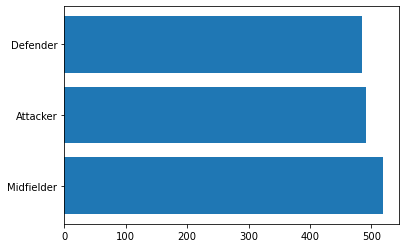

In [190]:
#plotting value counts of position group
plt.figure()
plt.barh(market_values_df['Position Group'].value_counts().index,
        market_values_df['Position Group'].value_counts().values)
plt.show()

### Splitting into `Position Group` Specific Data Frames
These will be used later on to examine differences in subgroups within each `Position Group`

In [191]:
#defenders
defender_df = market_values_df[market_values_df['Position Group'] == 'Defender']

#midfielders
midfielder_df = market_values_df[market_values_df['Position Group'] == 'Midfielder']

#attackers
attacker_df = market_values_df[market_values_df['Position Group'] == 'Attacker']

Our data set is well balanced across the three position groups. There are a few more *midfielders* than *defenders* and *attackers*, but there are also more `Positions` that fall under this group. The difference is negligible. Now let's look at the top 5 most valuable players at each position.

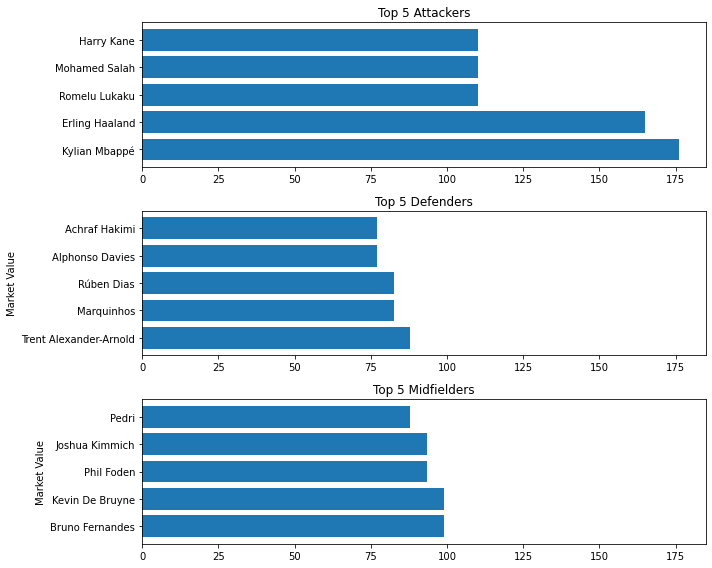

In [192]:
#increasing size of grid
plt.subplots(3, 1, figsize = (10,8))

#top five attackers
ax1 = plt.subplot(311)
plt.barh(y = attacker_df.sort_values('Market Values in Millions', ascending=False).head()['Name'],
         width = attacker_df.sort_values('Market Values in Millions', ascending=False).head()['Market Values in Millions'])
ax1.set_title('Top 5 Attackers')
ax2.set_ylabel('Market Value')

#top 5 defenders
ax2 = plt.subplot(312, sharex = ax1)
plt.barh(y = defender_df.sort_values('Market Values in Millions', ascending=False).head()['Name'],
         width = defender_df.sort_values('Market Values in Millions', ascending=False).head()['Market Values in Millions'])
ax2.set_title('Top 5 Defenders')
ax2.set_ylabel('Market Value')

#top 5 midfielders
ax3 = plt.subplot(313, sharex = ax1)
plt.barh(y = midfielder_df.sort_values('Market Values in Millions', ascending=False).head()['Name'],
         width = midfielder_df.sort_values('Market Values in Millions', ascending=False).head()['Market Values in Millions'])
ax3.set_title('Top 5 Midfielders')
ax3.set_ylabel('Market Value')

plt.tight_layout()
plt.show()

With the exception of the two most expensive attackers, midfielders and attackers have pretty similar values at the top of their positions. Defenders are valued a little less at the top than the other two position groups. 

### Shape of Market Value by `Position Group`

In [193]:
#defender descriptive statistics
defender_df['Market Values in Millions'].describe()

count    484.000000
mean      15.693409
std       15.460167
min        2.200000
25%        5.500000
50%        9.900000
75%       19.800000
max       88.000000
Name: Market Values in Millions, dtype: float64

In [194]:
#midfielder descriptive statistics
midfielder_df['Market Values in Millions'].describe()

count    519.000000
mean      17.005809
std       18.680095
min        0.330000
25%        4.400000
50%       11.000000
75%       22.000000
max       99.000000
Name: Market Values in Millions, dtype: float64

In [195]:
#attacker descriptive statistics
attacker_df['Market Values in Millions'].describe()

count    491.000000
mean      18.377169
std       22.084820
min        1.430000
25%        4.950000
50%       10.450000
75%       22.000000
max      176.000000
Name: Market Values in Millions, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

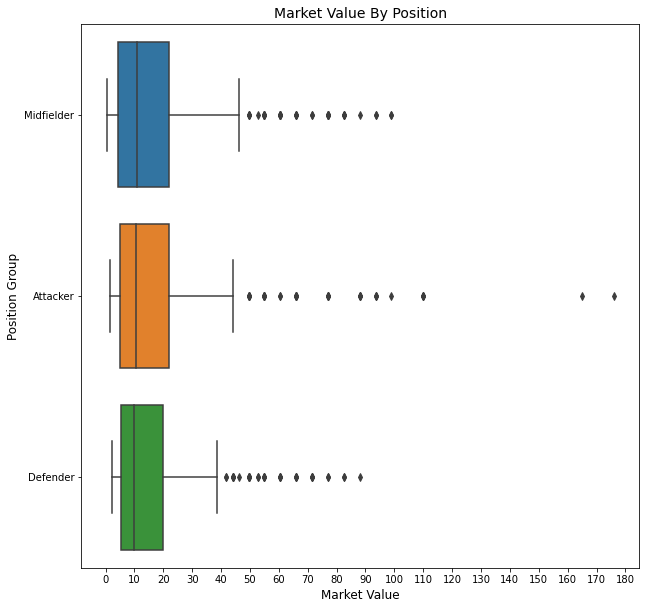

In [196]:
#plotting box plots of market vlaues by positiong group
plt.figure(figsize=(10, 10))
sns.boxplot(y = 'Position Group',
            x = 'Market Values in Millions',
            data = market_values_df)
plt.title('Market Value By Position', fontsize = 14)
plt.ylabel('Position Group', fontsize = 12)
plt.xlabel('Market Value', fontsize = 12)
#setting ticks to max values
plt.xticks(list(range(0,181, 10)))
plt.show

Here we see three very similar very similar distributions. Every median `Market Values in Millions` is within **100,000** dollars of the other groups. Defenders have the smallest inter-quartile range, and the most compressed set of outliers. With the exception of the two huge outliers already discussed, the midfield and attack plot are practically identical. 

In [197]:
#overlapping histogram
px.histogram(market_values_df, x="Market Values in Millions", color="Position Group", barmode="overlay")


As you can see from the plot above there is heavy overlap in the distribution of market values across position groups. All of position groups follow a similar distribution than that of the population. 

### ANOVA - Position Group

Now that our position groups are created. I will start by looking at average values by League, Position and position group

In [198]:
#average market value by position group
px.bar(market_values_df,
        x = market_values_df.groupby('Position Group').mean()['Market Values in Millions'].values,
        y = market_values_df.groupby('Position Group').mean()['Market Values in Millions'].index,
        orientation = 'h',
       title='Average Market Value by Position Group')

As we can se above, there appears to be a slight difference in averages across the position groups. I will now use an anova test to see if there is in fact a significant difference across the three position groups. 

**Null Hypothesis - There is no difference in means between `Position Groups`**

**Alternative Hypothesis - There is a difference in means between `Position Groups`**

In [199]:
#creating dict to append
anova_group = {}

#pulling list of position groups
position_groups = market_values_df["Position Group"].unique()

# slice out the time spent for each group
for position in position_groups:
    anova_group[position] = market_values_df.loc[market_values_df["Position Group"] == position, "Market Values in Millions"]

#running test
f_stat_group, p_value_group = stats.f_oneway(anova_group["Midfielder"], 
                                             anova_group["Defender"], 
                                             anova_group["Attacker"])

#printing results
print(f"F Statistic: {round(f_stat_group, 2)}")
print(f"F Statistic: {round(p_value_group, 5)}")

F Statistic: 2.45
F Statistic: 0.08698


There is not enough evidence to support that there is a statisticall significant difference between average values accross postion groups.

##  Market Value by Position Subgroup

Now I'm going to create three data frames. One for each position group. This will be used later to distinguish between `Position Subgroup`s within `Position Group`s. I am going to examine the shapes and distributions of each `Position Subgroup`, and conduct hypothesis tests to see if there is a statistically significant difference between market values within different position groups. 

### Market Value and Position Subgroup Across Position Groups
Before looking at the differences between `Position Subgroup` across `Position Group`.

In [200]:
#boxplot of position subgroups
ptypes_box = px.box(market_values_df, y = 'Position Subgroup', x = 'Market Values in Millions',
                    title='Market Values by Position Subgroups')
ptypes_box.show()

In [201]:
#aggregate market value descriptive statistics
aggregate = market_values_df.groupby("Position Subgroup").aggregate({"Market Values in Millions": ["mean", "std", "count"]})
display(aggregate)

Market Values in Millions                 
                                          mean        std count
Position Subgroup                                              
Attacking Midfielder                 16.291355  19.976948   155
Center Back                          18.030163  16.585417   246
Central Attacker                     16.952741  22.195362   259
Holding Midfielder                   17.310041  18.119827   364
Wingback                             13.278109  13.828331   238
Winger                               19.967371  21.899068   232

The box plots for **Center Backs** and **Wingers** are practically identical. Throughout the data table we can see that on average, wingers are more valued, but they also have higher standard deviation, indicating the presence of outliers that can be seen on the box plot. I was surprised by the fact that **Center Backs** had a higher mean value than **Central Attackers** despite the fact that there are 2 massive outliers in **Central Attackers**. In fact the group that **Central Attackers'** box plot is most similar to is **Attacking Midfielders**. **Wingbacks** appear to not have the same value as the other positions, which will I will test now, using an ANOVA test. 

In [202]:
#appending dictionary
ptype_anova = {}
#subgroups list
ptypes = market_values_df['Position Subgroup'].unique()

#slicing out the market values for each position Subgroup
for ptype in ptypes:
    ptype_anova[ptype] = market_values_df.loc[market_values_df['Position Subgroup'] == ptype, 'Market Values in Millions']

In [203]:
#check step
ptype_anova['Holding Midfielder']

0        0.880
13      93.500
14      93.500
19      88.000
23      82.500
         ...  
1486     0.880
1487     0.880
1489     0.825
1490     0.770
1491     0.660
Name: Market Values in Millions, Length: 364, dtype: float64

**Null Hypothesis: There is no difference in means between `Position Subgroups`**

**Alternative Hypothesis: There is a difference in means between `Position Subgroups`**

In [204]:
#running test
f_stat_type, p_value_type = stats.f_oneway(ptype_anova['Center Back'],
                                   ptype_anova['Wingback'],
                                   ptype_anova['Holding Midfielder'],
                                   ptype_anova['Attacking Midfielder'],
                                   ptype_anova['Central Attacker'],
                                   ptype_anova['Winger'])

#printing results
print(f"F Statistic: {round(f_stat_type, 2)}")
print(f"P Value: {round(p_value_type, 2)}")

F Statistic: 3.2
P Value: 0.01


As there is not enough statistical evidence to reject our null hypothesis, it is time to move on to `Position Subgroup` with `Position Group`, though it would be if tested by itself.

### Splitting up `Position Group`s into their own Data Frame

### Creating Master Plotting Fuction. 
Next, I will create a function to create all the necessary plots for analysis for each set of `Position Subgroup`s within `Position Group`s. This will contain the following

* The total number of each position subgroup
* A box plot of Market Values by `Position Subgroup`
* The average Market Values by `Position Subgroup`
* Histograms of the distribution of Market Values by `Position Subgroup`
* Top valued players at each `Position Subgroup`

In [205]:
#TODO fix the histograms to have the same y axis. last two horizontal bar charts to have the same axis. 

def Position_Type_Plots(dataframe):
    '''
    #This function is designed to print value counts as well as a subplot of various EDA plots

    Parameters:
        dataframe - the datafarme in which we are running the following plots

    #Returns:
     Salue counts of Position Subgroup
     Box Plot of Distribution of Market Value by Position Subgroup
     Horizontal Bar Chart of Average Market Value by Position Subgroup
     Histograms of Each Position Subgroup Market Values
     Top 5 Players by Market Value for Each Position Subgroup
     '''
    #pulling out position group
    group = dataframe['Position Group'].unique()[0]
    
    #displaying value counts of each position subgroup
    print(f"These are the value counts for the Position Subgroup at the {group} Position")
    display(dataframe['Position Subgroup'].value_counts())

    

    boxplot_title = 'Market Values by ' + group + 'Position Subgroups'
    
    #setting subplot grid
    plt.subplots(3,2, figsize = (15, 15))
 
    #supertitle
    super_title = group + (' Analysis \n')
    plt.suptitle(super_title, size = 20)

    #creating box plot
    plt.subplot(3,2,1)
    sns.boxplot(data = dataframe, y = 'Position Subgroup', x = 'Market Values in Millions')
    plt.title(boxplot_title)

    #averages in dataframe
    average_by_type = dataframe.groupby('Position Subgroup').mean()['Market Values in Millions']

    #averages by position subgroup title
    barh_title1 = 'Average Market Value by' + group +'Position Subgroups'
    plt.subplot(3,2,2)
    
    #averages by position subgroup horizontal bar chart
    plt.barh(y = average_by_type.index,
             width = average_by_type.values)
    plt.title(barh_title1)
    plt.xlabel('Average Market Value')
    plt.ylabel('Position Subgroup')
    
    
    #pulling different position subgroups
    #note that each group has 2 subgroups so this will work for all of them
    type1 = dataframe['Position Subgroup'].value_counts().index[0]
    type2 = dataframe['Position Subgroup'].value_counts().index[1]

    #hitogram for type 1
    hist_title1 = type1 + ' Market Value Distribution'
    plt.subplot(3,2,3)
    plt.hist(x = dataframe[dataframe['Position Subgroup'] == dataframe['Position Subgroup'].value_counts().index[0]]['Market Values in Millions'], bins = 10)
    plt.title(hist_title1)
    plt.xlabel('Market Value')
    plt.ylabel('Frequencey')

    #histogram for type 2
    hist_title2 = type2 + ' Market Value Distribution'
    plt.subplot(3,2,4)
    plt.hist(x = dataframe[dataframe['Position Subgroup'] == dataframe['Position Subgroup'].value_counts().index[1]]['Market Values in Millions'], bins = 10)
    plt.title(hist_title2)
    plt.xlabel('Market Value')
    plt.ylabel('Frequencey')

    top_players_df1 = dataframe[dataframe['Position Subgroup'] == dataframe['Position Subgroup'].value_counts().index[0]].sort_values('Market Values in Millions', ascending=False).head()

    
    
    #top players type 1
    plt.subplot(3,2,5)
    plt.barh(y = top_players_df1['Name'],
             width = top_players_df1['Market Values in Millions'])
    barh_title2 = 'Top ' + type1 + 's'
    plt.title(barh_title2)
    plt.ylabel('Player Name')
    plt.xlabel('Market Value')

    #top players type 2
    top_players_df2 = dataframe[dataframe['Position Subgroup'] == dataframe['Position Subgroup'].value_counts().index[1]].sort_values('Market Values in Millions', ascending=False).head()
    plt.subplot(3,2,6)
    plt.barh(y = top_players_df2['Name'],
             width = top_players_df2['Market Values in Millions'])
    barh_title3 = 'Top ' + type2 + 's'
    plt.title(barh_title3)
    plt.ylabel('Player Name')
    plt.xlabel('Market Value')

    plt.tight_layout()
    plt.show()

### Defenders

These are the value counts for the Position Subgroup at the Defender Position


Center Back    246
Wingback       238
Name: Position Subgroup, dtype: int64

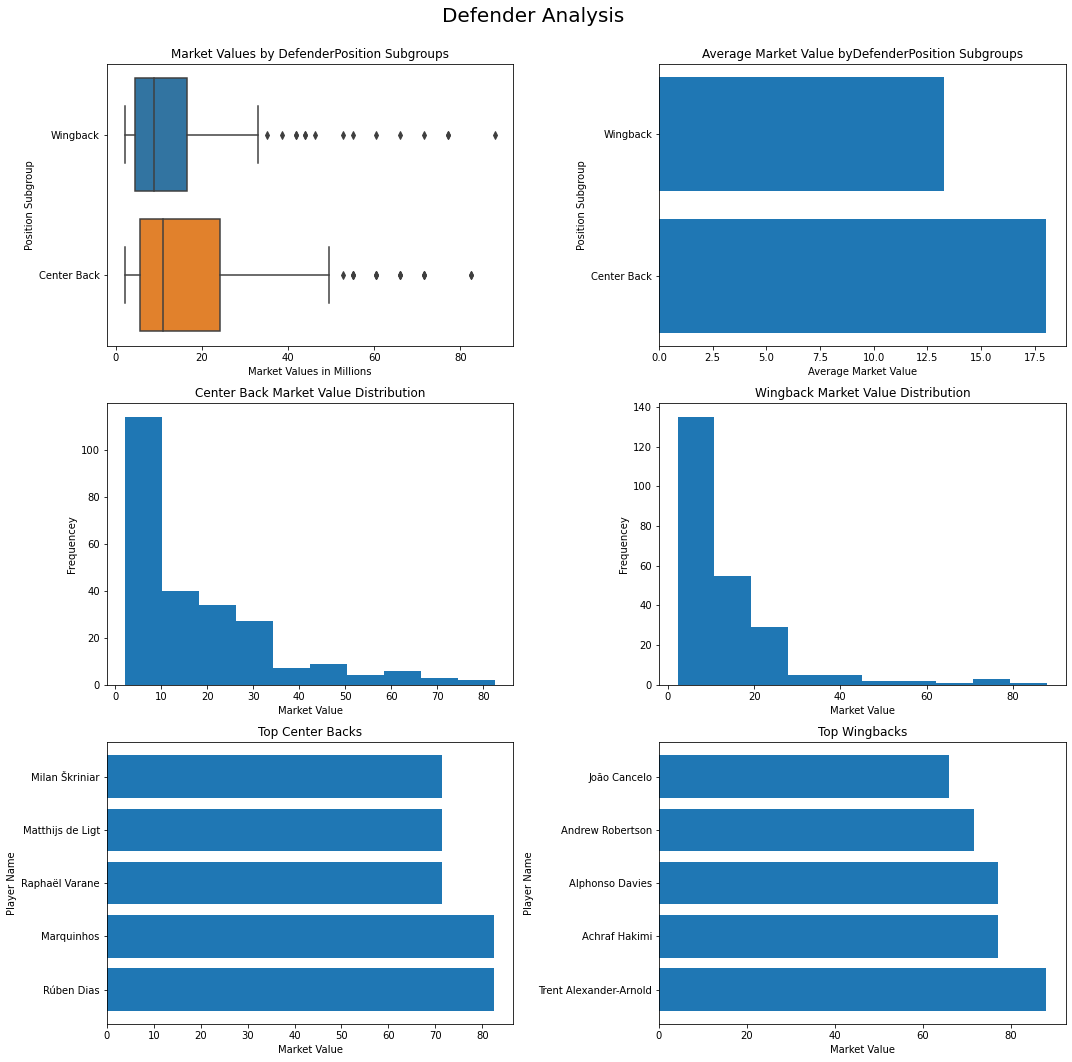

In [206]:
#running above function
Position_Type_Plots(defender_df)

Notes on the Plots Above

**Value Counts** - There is minimal difference in the number of `Center Backs` and `Wing Backs` in the Distribution 

**Box Plot** - `Wingbacks` appear to have a lower median `Market Value in Millions`, as well as a smaller inter quartile Range than `Center Backs`

**Bar Graph 1** - `Center Backs` have a higher average value than `Wingbacks`. I will test to see if this is statistically significant shortly

**Histograms** Both data sets are skewed to the right, but `Wingbacks` market values drops immediately follwoing the 30 million mark. `Center Backs` have a more players at higher values


Now am going to do a t-test to see if there is a statistically signficant difference between these two defender subgroups. Fisrt I'm going to turn this into a function, so I can use it for the other two `Position Groups` as well. 

In [207]:
#creating t test function
def Position_Type_TTest(dataframe):
    '''
    Runs t-test on position subgroups within the data frame
    inputs
    Dataframe - Position specific data frame
        This function is built on their being only two subgroups per position group
    Outputs: Results
    '''
    #pulling position group for later
    group = dataframe['Position Group'].unique()[0]
    
    #splitting up into center back and  wing back

    type0_df = dataframe[dataframe['Position Subgroup'] == dataframe['Position Subgroup'].unique()[0]]
    type1_df = dataframe[dataframe['Position Subgroup'] == dataframe['Position Subgroup'].unique()[1]]

    #t-test

    tstat, pvalue_ptype = stats.ttest_ind(type0_df['Market Values in Millions'],
                          type1_df['Market Values in Millions'])

    #creating p value print outs if there 
    if pvalue_ptype > 0.00714:
        print(f'With a p value of {pvalue_ptype}, we can not reject the null hypothesis, as our p-value is greater than 0.00714.')
        print(F"There is no statistically significant difference in player value across Position Subgroups for {group}s")
    
    else:
        print(f'With a p value of {pvalue_ptype}, we can reject the null hypothesis, as our p-value is less than 0.00714.')
        print(F"There is a statistically significant difference in player value across Position Subgroups for {group}s")

**Null Hypothesis: There is no difference in means between defender subgroups**

**Alternative Hypothesis: There is a difference in means between defender subgroups**

In [208]:
#testing subgroups
Position_Type_TTest(defender_df)

With a p value of 0.0006847078280839161, we can reject the null hypothesis, as our p-value is less than 0.00714.
There is a statistically significant difference in player value across Position Subgroups for Defenders


**We can reject the null hypothesis, there is statistical evidence to show that Center Backs are valued more highly than Wing Backs**

### Midfielders

These are the value counts for the Position Subgroup at the Midfielder Position


Holding Midfielder      364
Attacking Midfielder    155
Name: Position Subgroup, dtype: int64

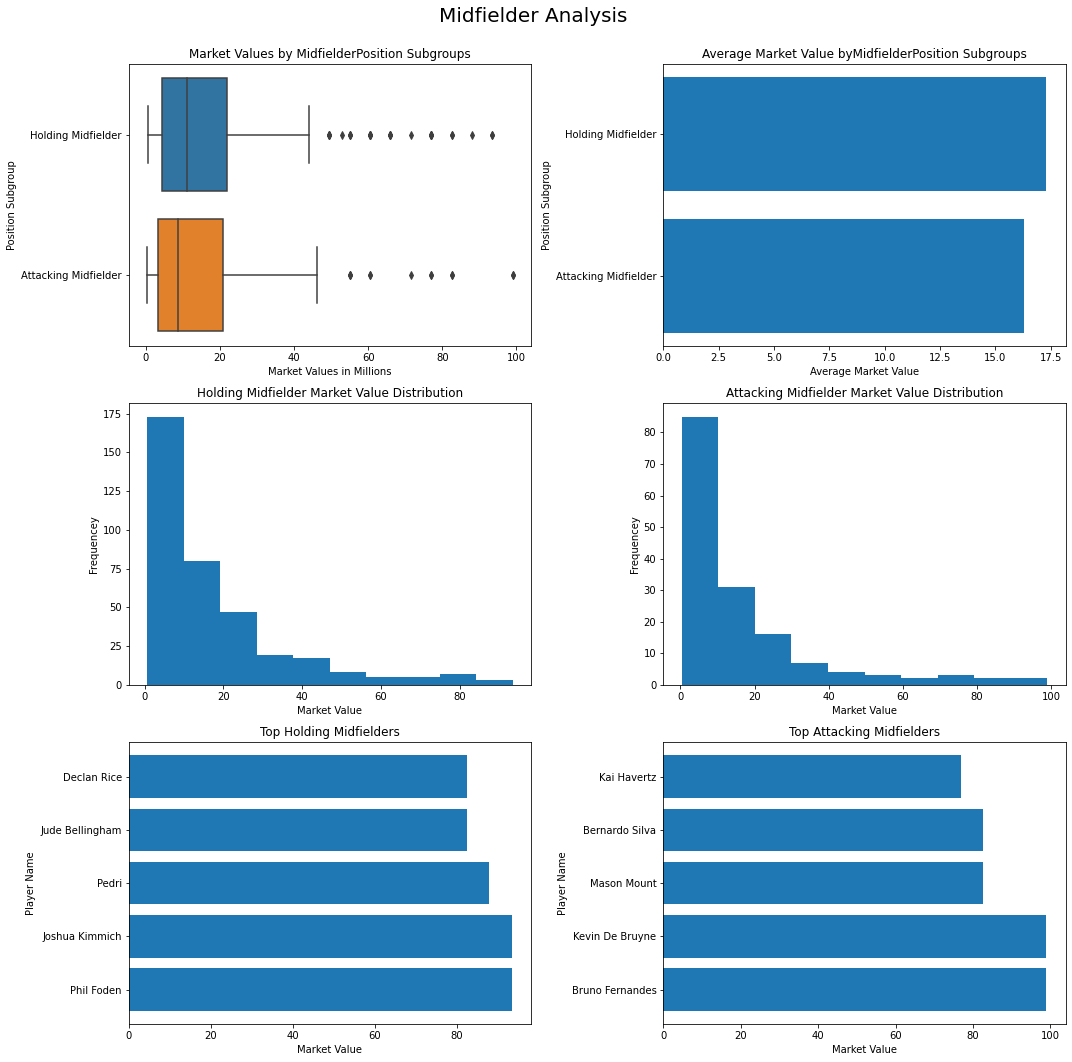

In [209]:
#plotting
Position_Type_Plots(midfielder_df)

**Notes on the Plots Above**

Value Counts - There is a large difference between the number of **holding midfielders** and attacking **midfielders**. LM, RMs and CAM were some of the smallest individual positions, but I do feel that is an importnat distinction, and for this specific test I feel that we have enough data. This might be a problem in the future. 

Box Plot and Bar Graph 1 - Similar distributions on the box plot. **Attacking Midfielders** box is pushed to the left, showing a smaller median and interquartile range. They also have a smaller average value than **Holding Midfielders**

Histograms - Very similar distributions, with smaller heights for **Attacking Midfielders**, but again, there are 200 less **attacking midfielders** than **holding midfielder**

Bar graph 2 & 3 - Similar values for the top 5 players. 

The values are too close. I will not run a t-test on these subgroups

###  Attackers

These are the value counts for the Position Subgroup at the Attacker Position


Central Attacker    259
Winger              232
Name: Position Subgroup, dtype: int64

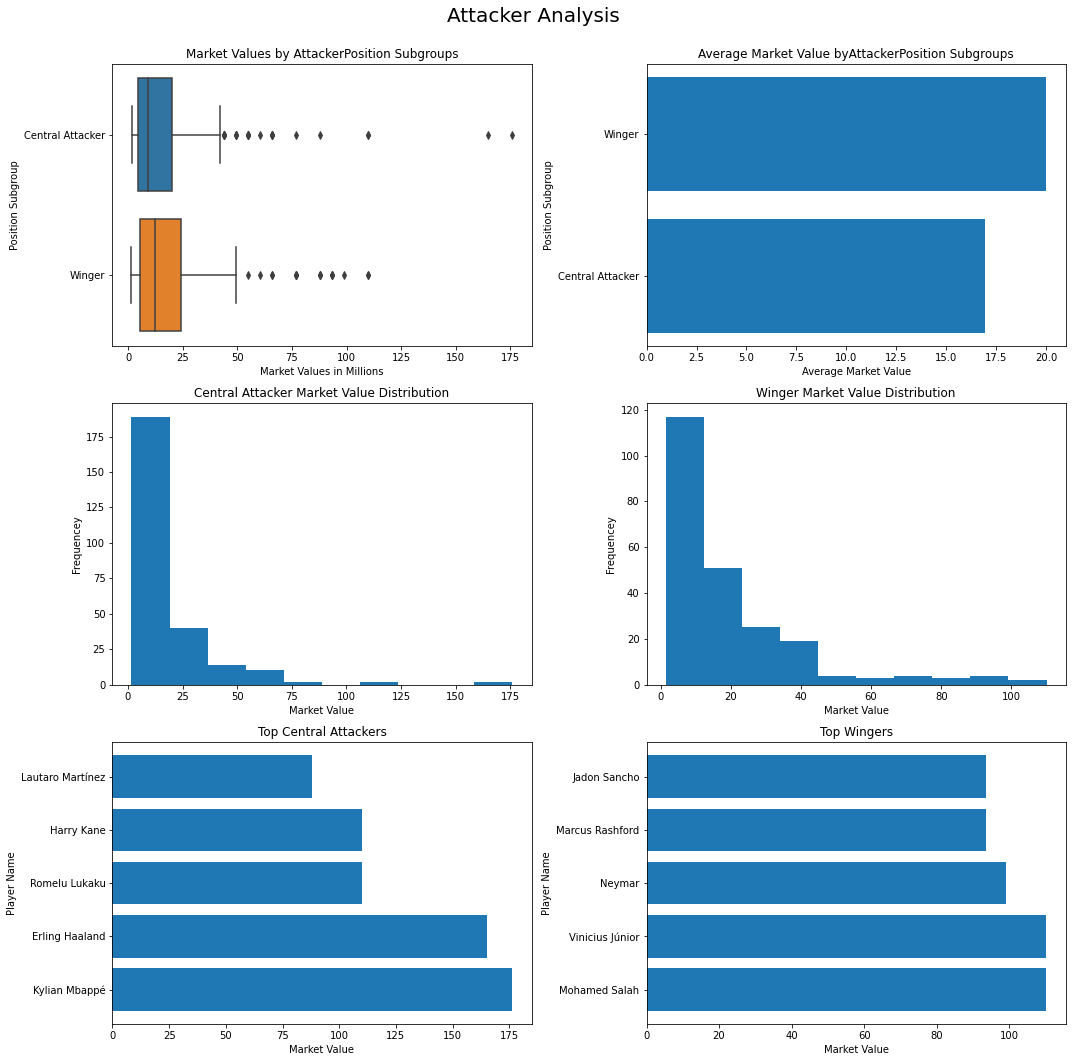

In [210]:
#plotting
Position_Type_Plots(attacker_df)

Notes on the Plots Above

Value Counts - There is minimal difference in the number of **wingers** and **central attackers** in the data set

Box Plot & Bar Graph 1 - Surprisingly, **wingers** have a higher median and average value than **central attackers**. 

Histograms: Similar distributions

Bargraph 2 & 3. Not a lot of information to be gained here, as we've seen most of these players already in the bar graph above.

In [211]:
#testing
Position_Type_TTest(attacker_df)

With a p value of 0.1311703878154142, we can not reject the null hypothesis, as our p-value is greater than 0.00714.
There is no statistically significant difference in player value across Position Subgroups for Attackers


We can not reject the null here, there is not enough statistical evidence to suggest one of these groups is more highly valued than the other. 

### Market Values: Attacking Players vs. Non Attacking Players

I am now going to examine the difference in market values between attacking players and non attacking players

### Creating Attacker Column

In [212]:
#creating attacker binary column
attacker_map = {'ST' : 'Attacker',
                       'RW' : 'Attacker',
                       'LW' : 'Attacker',
                       'CF' : 'Attacker',
                       'CAM' : 'Attacker',
                       'RM' : 'Attacker',
                       'LM' : 'Attacker',
                       'CM' : 'Non Attacker',
                       'CDM' : 'Non Attacker',
                       'RB' : 'Non Attacker',
                       'LB' : 'Non Attacker',
                       'CB' : 'Non Attacker'}

#creating columns Attacker Binary Column
market_values_df['Attacker'] = market_values_df['Position'].map(attacker_map)

#check step
market_values_df['Attacker'].value_counts()

Non Attacker    848
Attacker        646
Name: Attacker, dtype: int64

### Shape of Market Value by Attacking Status

In [213]:
#box plot
px.box(market_values_df, x = 'Market Values in Millions', y = 'Attacker')

### Average Market Value by Attacker Status

In [214]:
#pulling averages by attacking status
average_by_attacker = market_values_df.groupby('Attacker').mean()['Market Values in Millions']

#plotting averages
px.bar(average_by_attacker, x=average_by_attacker.values, y= average_by_attacker.index, orientation = 'h')

### Hypothesis Testing

**Null Hypothesis: Attackers and Non-Attackers have equal mean market values**

**Alternative Hypothesis: Attackers and Non-Attackers have unequal mean market values**

In [215]:
#pulling all attackers
attackers = market_values_df[market_values_df['Attacker']=='Attacker']

#pulling all non_attackers
non_attackers = market_values_df[market_values_df['Attacker']=='Non Attacker']

#statistical test
tstat, pval = stats.ttest_ind(attackers['Market Values in Millions'], 
                              non_attackers['Market Values in Millions'])

print(f"t-statistic: {round(tstat, 2)}")
print(f"p-value: {round(pval, 2)}")

t-statistic: 1.5
p-value: 0.13


There is not enough evidence to reject the null hypothesis. We can not conclude that there is a difference between the average value of attackers vs. non-attackers.

### Market Values by League
In this section I will compare `Market Values in Millions` across all of the big 5 leagues.

### Shape of `Market Values in Millions` by League
I will look at a box plot of the 5 Leagues Market values to compare their respective shapes. 

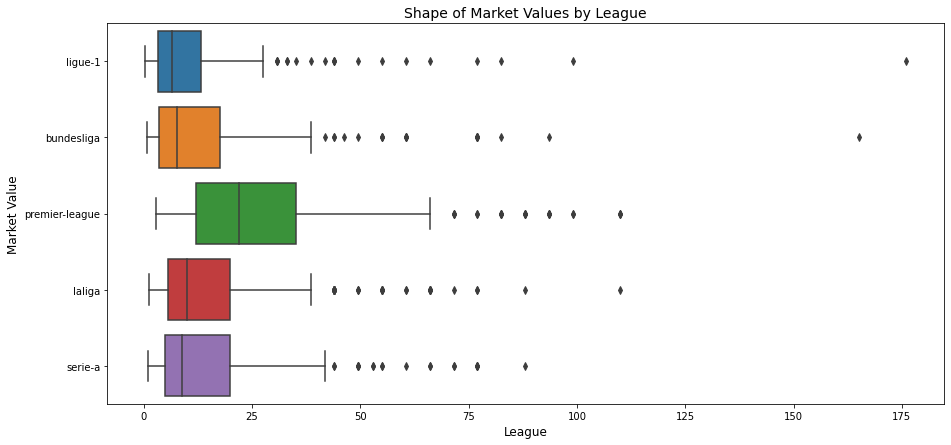

In [216]:
#box plot
plt.figure(figsize=(15, 7))
sns.boxplot(data = market_values_df, x = 'Market Values in Millions', y = 'League')
plt.title('Shape of Market Values by League', fontsize = 14)
plt.xlabel('League', fontsize = 12)
plt.ylabel('Market Value', fontsize = 12)
plt.show()

We can see in the above plot that the Premier League players have much larger valuations then other leagues. The first quartile of Premier League players is higher than the median of every other league, and higher than the third quartile of Ligue 1. Their median is higher than the third quartile of every other league. This is because the premier league has a better TV deals across the globe than other leagues. This allows lower level teams to get more money and thus buy better players. Looking at the graph on this link (https://www.statista.com/statistics/300578/team-value-of-soccer-teams/), you can see that 9 of the top 20, and 5 of the top 10 most valuable soccer clubs in the world are Premier League clubs, where as no other league has more than 4.

Bundesliga, Serie A and La Liga all have very similar distributions. These leagues all have similar makeups. There are a few clubs in each league that are the most valuable, and a handful of other smaller clubs.

Ligue 1 has one dominant club, Paris Saint Germain or PSG, which speaks to why it has the smallest box plot. 

In [221]:
#pulling market values
market_values_df.groupby('League').mean()['Market Values in Millions']

League
bundesliga        13.847222
laliga            16.323241
ligue-1           11.512095
premier-league    27.966776
serie-a           15.273518
Name: Market Values in Millions, dtype: float64

In [222]:
#sorting from highest to lowest market values
league_avg = market_values_df.groupby('League').mean()['Market Values in Millions']

league_avg_sorted = league_avg.sort_values(ascending=False)

league_avg_sorted

League
premier-league    27.966776
laliga            16.323241
serie-a           15.273518
bundesliga        13.847222
ligue-1           11.512095
Name: Market Values in Millions, dtype: float64

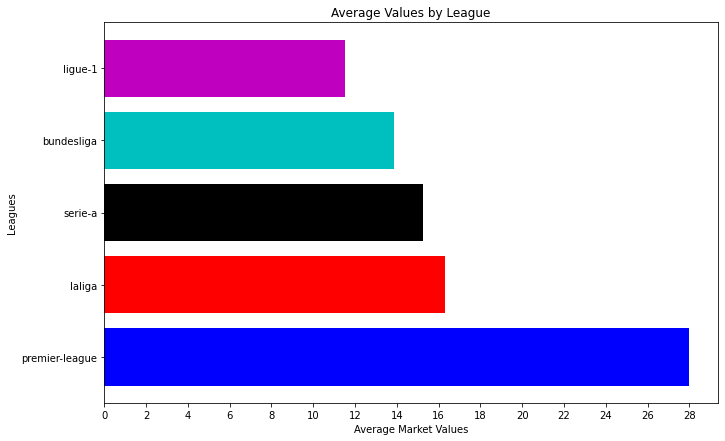

In [223]:
#plotting league average
plt.figure(figsize = (11, 7))
plt.barh(league_avg_sorted.index,
         league_avg_sorted.values,
        color = ['b', 'r', 'k', 'c', 'm'])
plt.xlabel('Average Market Values')
plt.ylabel('Leagues')
plt.title('Average Values by League')
plt.xticks(range(0, 30, 2))
plt.show()

We can see that there are a wide gap between The Premier League and everyone else. It is almost twice as large as La Liga, the league with the second highest average, and Ligue 1, which has the lowest average market value. Now we can run the ANOVA test.

### ANOVA - LEAGUE

**Null Hypothesis: There is no difference in means between leagues**

**Alternative Hypothesis: There is a difference in means between leagues**

In [224]:
#CREATING DICTIONARY
anova_data_league = {}
leagues = market_values_df["League"].unique()

# slice out the time spent for each browser type
for league in leagues:
    anova_data_league[league] = market_values_df.loc[market_values_df["League"] == league, "Market Values in Millions"]


#RUNNING TEST
f_stat_anova, p_value_anova = stats.f_oneway(anova_data_league["premier-league"], 
                              anova_data_league["laliga"], 
                              anova_data_league["serie-a"],
                              anova_data_league["bundesliga"], 
                              anova_data_league["ligue-1"])
if p_value_anova > 0.00714:
    print(f'With a p value of {p_value_anova}, we can not reject the null hypothesis, as our p-value is greater than 0.00714. There is no statistically significant difference in average player value across position groups')
    
else:
        print(f'With a p value of {p_value_anova}, we can reject the null hypothesis, as our p-value is less than 0.00714. There is a statistically significant difference in average player value across position groups')

With a p value of 3.863168596326132e-30, we can reject the null hypothesis, as our p-value is less than 0.00714. There is a statistically significant difference in average player value across position groups


The p-value is so low that there can be no claims of p-hacking, despite this being the final test of many in this notebook. Now I will look into the Tukey pairwise comparison to see where this is happening. 

In [225]:
#tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd
pairwise_tukeyhsd(market_values_df['Market Values in Millions'], market_values_df['League']).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
bundesliga,laliga,2.476,0.4621,-1.6035,6.5555,False
bundesliga,ligue-1,-2.3351,0.5137,-6.3937,1.7234,False
bundesliga,premier-league,14.1196,0.001,10.0878,18.1513,True
bundesliga,serie-a,1.4263,0.8556,-2.5957,5.4483,False
laliga,ligue-1,-4.8111,0.0115,-8.8941,-0.7282,True
laliga,premier-league,11.6435,0.001,7.5873,15.6998,True
laliga,serie-a,-1.0497,0.9,-5.0963,2.9968,False
ligue-1,premier-league,16.4547,0.001,12.4195,20.4898,True
ligue-1,serie-a,3.7614,0.0803,-0.264,7.7868,False
premier-league,serie-a,-12.6933,0.001,-16.6916,-8.6949,True


Unsurprisingly, there is a significant difference between the Premier League values and every other league. The Premier League is the richest league in the world, and the one with the most parity amongst it's teams as well. 

# Statistical Breakdowns
In this section I will look at the distribution of different statistical distributions. First i will do this across `Position Group`, then across the `Position Subgroup`s within each `Position Group`. The purpose of this is to gain a better understanding of how each of the groups and subgroups differ. 

To accomplish this, I will be plotting box plots for a subset of statistical measures that I feel provide a good snapshot of soccer skills. Once plotted I will compare the differences. In the end I hope to illustrate the differences of each `Position Group`/`Position Subgroups`

## Statistical Breakdown by `Position Group`.

Before beginning, I need to create a data frame with only the statistical measure. I will be dropping all of the non-numerical columns except for `Position Group`. I need this to split my box plots by.  I will be removing `Market Values in Millions` as it has already been examined, and `90s` as it is not specific to any skill. To do this I am going to create a list of all the columns to drop then create a new data frame without the columns to use for EDA. 

### Creating New Data Frame

In [226]:
#for reference
market_values_df.columns

Index(['Name', 'League', 'Club', 'Position', 'Age', 'Nationality',
       'Market Values in Millions', '90s', 'Gls/90', 'Ast/90', 'PK/90',
       'Non PK Gls/90', 'Yellow Cards/90', 'Red Cards/90', 'xG/90',
       'non PK xG/90', 'xA/90', 'Shots/90', 'Shots on Target/90',
       'Free Kicks/90', 'Passes Cmp', 'Attempts', 'Pass Cmp/90',
       'Pass Cmp Pctg', 'Short Cmp', 'Short Att', 'Short Pass Cmp/90',
       'Short Pass Cmp Pctg', 'Medium Pass Cmp', 'Medium Pass Att',
       'Medium Pass Cmp/90', 'Medium Pass Cmp Pctg', 'Long Pass Cmp/90',
       'Long Pass Cmp Pctg', 'Attacking Passes/90',
       'Successful Box Crosses/90', 'Progressing Passes/90',
       'Through Balls/90', 'Passes under pressure/90', 'Switches/90',
       'Crosses/90', 'Bad Passes/90', 'SCA/90', 'GCA/90', 'Tkl Won/90',
       'Tkl Success Rate', 'Tkl vs Dribbles/90',
       'Tkl vs. dribbles Success Rate', 'Successful Presses/90',
       'Press Success Rate', 'Blocks/90', 'Int/90', 'Clearances/90',
       'Erro

In [228]:
#making drop list
drop_list = ['Position Subgroup', 'Attacker', 
            'Name', 'League', 'Club', 'Position', 'Nationality',
            'Market Values in Millions', '90s']
#creating new data frame
market_value_eda = market_values_df.drop(columns=drop_list)

#checking
print(market_value_eda.columns)

Index(['Age', 'Gls/90', 'Ast/90', 'PK/90', 'Non PK Gls/90', 'Yellow Cards/90',
       'Red Cards/90', 'xG/90', 'non PK xG/90', 'xA/90', 'Shots/90',
       'Shots on Target/90', 'Free Kicks/90', 'Passes Cmp', 'Attempts',
       'Pass Cmp/90', 'Pass Cmp Pctg', 'Short Cmp', 'Short Att',
       'Short Pass Cmp/90', 'Short Pass Cmp Pctg', 'Medium Pass Cmp',
       'Medium Pass Att', 'Medium Pass Cmp/90', 'Medium Pass Cmp Pctg',
       'Long Pass Cmp/90', 'Long Pass Cmp Pctg', 'Attacking Passes/90',
       'Successful Box Crosses/90', 'Progressing Passes/90',
       'Through Balls/90', 'Passes under pressure/90', 'Switches/90',
       'Crosses/90', 'Bad Passes/90', 'SCA/90', 'GCA/90', 'Tkl Won/90',
       'Tkl Success Rate', 'Tkl vs Dribbles/90',
       'Tkl vs. dribbles Success Rate', 'Successful Presses/90',
       'Press Success Rate', 'Blocks/90', 'Int/90', 'Clearances/90',
       'Errors/90', 'Touches/90', 'Mid 3rd Touches/90', 'Att 3rd Touchs/90',
       'Att Pen Touches/90', 'Successf

Now I am going to create lists to represent various statistical categories. These will be used for all of the following explorations. 

In [229]:
#creating lists
scoring_shooting  = ['Gls/90', 'Shots/90', 'Shots on Target/90']
fouls = ['Yellow Cards/90', 'Fouls Committed/90',
                  'Fouls drawn/90']
passing = ['Pass Cmp/90','Pass Cmp Pctg', 'Short Pass Cmp/90', 
          'Medium Pass Cmp/90', 'Long Pass Cmp/90', 'Progressing Passes/90']
crosses_switches = ['Crosses/90', 'Switches/90']
creation = ['SCA/90', 'GCA/90']
assists = ['Ast/90', 'Through Balls/90', 'Attacking Passes/90']
tackles = ['Tkl Won/90','Tkl Success Rate', 'Tkl vs Dribbles/90']
pressing = ['Successful Presses/90','Press Success Rate'] 
other_defensive_stats = ['Blocks/90', 'Int/90', 'Clearances/90']
touches = ['Mid 3rd Touches/90', 'Att 3rd Touchs/90','Att Pen Touches/90']
dribbles = ['Successful Dribbles/90', 'Dribble Success Rate']
carries = ['Carries/90', 'Progressive Carries/90', 'Attacking Carries/90']
recieving = ['Rec/90', 'Rec Success Rate']
aerial = ['Aerial Battles Won/90','Aerial Battle Success Rate']

#creating list of the breakdowns for reference
stats_breakdown = ['scoring', 'fouls', 'passing', 'crosses',
                   'creation', 'assists', 'tackles', 'tackles_vs_dribbles',
                   'pressing', 'other_defensive_stats', 'touches', 'dribbles',
                   'carries', 'recieving', 'aerial']

### Statistical Breakdowns by Position Group
Before beginning, I am going to create a function that will create box plots of all of the above lists.

In [230]:
#To Do Move
def Subgroup_Stat_Compare(df, stat_type, split_col):
    '''
    Used to compare distribution of related statistics
    
    Inputs: dataframe, stat_type
    
    stat_type (list) - list of related statistical features
    
    Outputs: Boxplot for each of the features in stat_type
    '''
    for stat in stat_type:
        plt.figure()
        sns.boxplot(data = df,
                    x = stat,
                    y = split_col)
        plt.title(stat)
        plt.show()

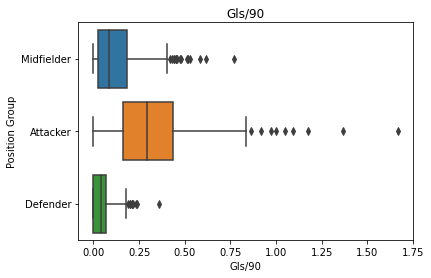

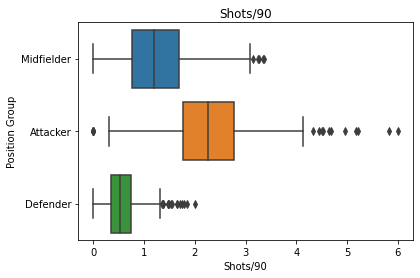

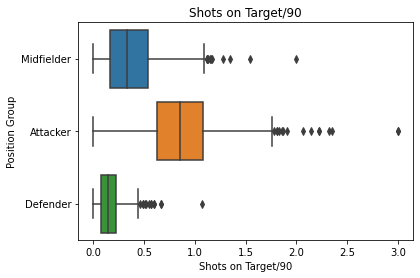

In [231]:
Subgroup_Stat_Compare(market_value_eda, scoring_shooting, 'Position Group')

Here we see, what is to be expected. Attackers get more shots off and score more goals than everybody else, and defenders get the least. Midfielder are in the middle (pun intended).

There are a few interesting things to note here.
1. There is a defender who scores above the median of attackers.
2. The attacker box remains similarly proportioned across all three plots. However, midfielders and defenders, their widest box is the `shots/90` box. This is most likely because these players take more difficult shots. Since they play farther away from net, it would make sense that most of their shots wouldn't hit the target let alone the back of the net. 

#### Assists

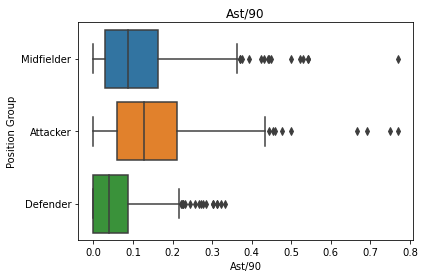

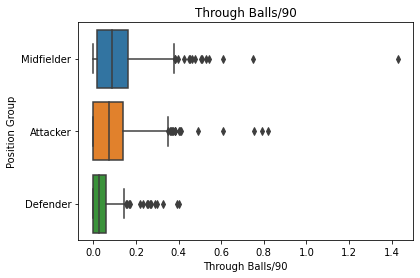

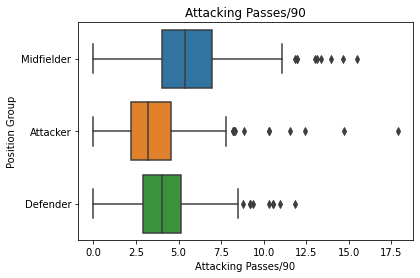

In [279]:
Subgroup_Stat_Compare(market_value_eda, assists, 'Position Group')

Attackers get more assists but midfielders play more through balls. This paints a familiar picture for soccer fans. The midfielder plays the pass that springs the attacker through, and the attacker finds his teammate to finish the job if he doesn't finish it himself.

It makes sense that attackers would make the least amount of passes into the attacking third. They are usually the ones receiving these passes, not making them.

#### Passing 

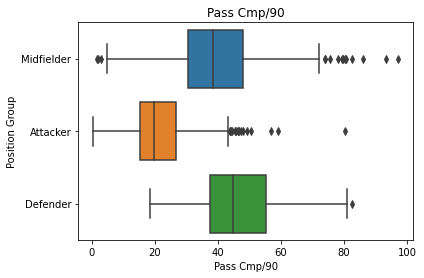

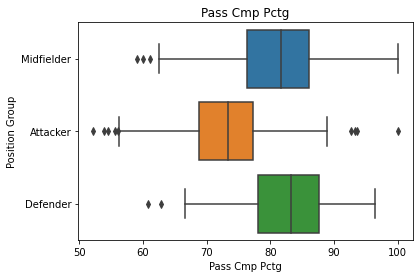

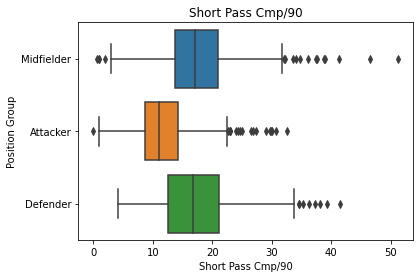

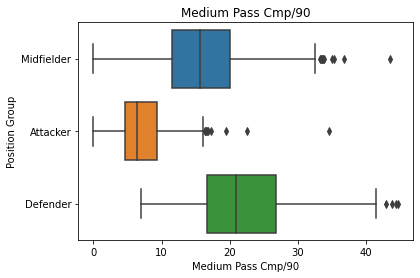

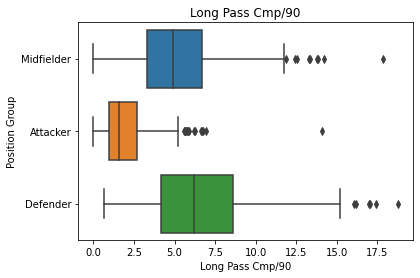

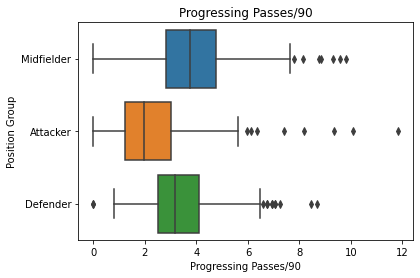

In [280]:
Subgroup_Stat_Compare(market_value_eda, passing, 'Position Group')

This is surprising. I would have thought that defenders play the most `Long Passes/90` as they sit farther back in the pitch and have more space to pass, but not that they would play more passes in general. Here we see the role of the midfielder though, to play passes in tight spaces to teammates to control possession, I just would've thought that would make up the majority of the passes made, but I was wrong. 

Midfielders are pushing the ball forward. They make the most `Progressing Passes/90`. That tells me that defenders are not passing to attack up field, but often with their closest teammate. 

#### Receiving

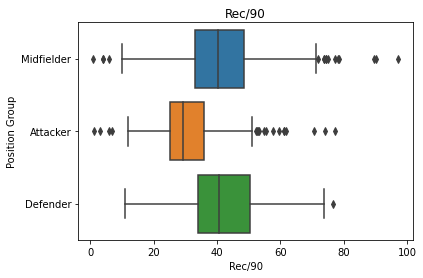

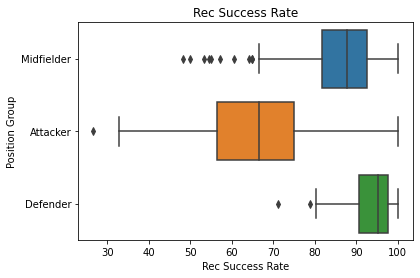

In [232]:
Subgroup_Stat_Compare(market_value_eda, recieving, 'Position Group')

Teams do not want attackers to get the ball, so they make it as hard as possible on their opponent to do just that. That is why attackers have the lowest number of `Rec/90` and the lowest `Rec Success Rate`. It is interesting to note that the closer a player is to their opposing teams net, the worse they're `Rec Success Rate` is likely to be.

#### Shot/Goal Creation

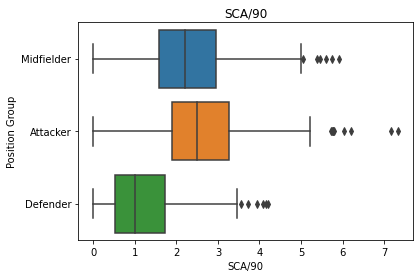

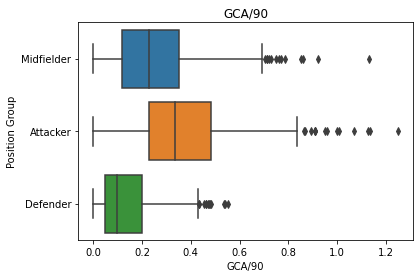

In [233]:
Subgroup_Stat_Compare(market_value_eda, creation, 'Position Group')

Midfielders and attackers are far ahead of defenders here. It is not the defenders role to create chances, but rather to prevent them. 

#### Crosses

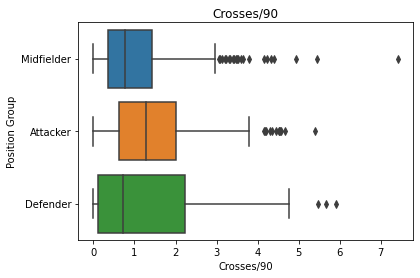

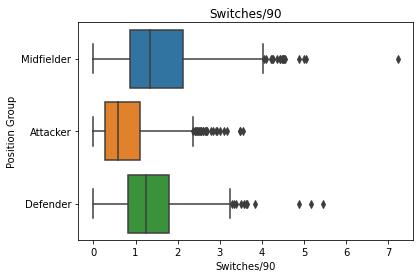

In [283]:
Subgroup_Stat_Compare(market_value_eda, crosses_switches, 'Position Group')

Switches, when a player passes the ball from one side of the pitch to another, are done away from the opposing goal, so it's not surprising that midfielders and defenders dominate this category. 

Crosses are attacking passes from the side of the of the pitch into the box. Attackers, most likely wingers, are the most likely to make these passes. The range for the defender box is notable, as you can see the gab in crosses from center backs and wingbacks starting to show.

#### Aerial

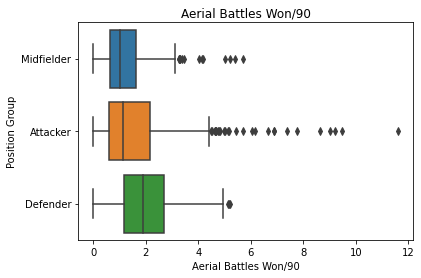

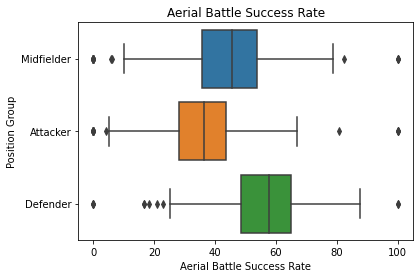

In [234]:
Subgroup_Stat_Compare(market_value_eda, aerial, 'Position Group')

Center backs make there money heading balls away from the net (well maybe, we'll confirm that in the next notebook). Attackers get to more headers than midfielders, but they're success rate is way lower. A lot of crosses get sent to attackers, but only a small few actually connect. 

#### Dribbles and Carries
These two look at how often a player has the ball at their feet, so they will be examined together.

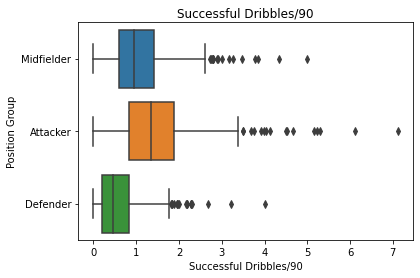

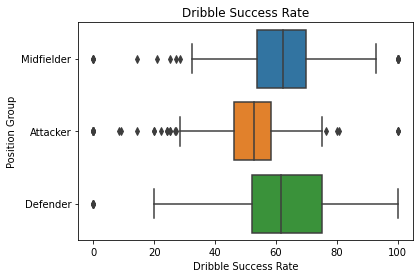

In [235]:
Subgroup_Stat_Compare(market_value_eda, dribbles, 'Position Group')

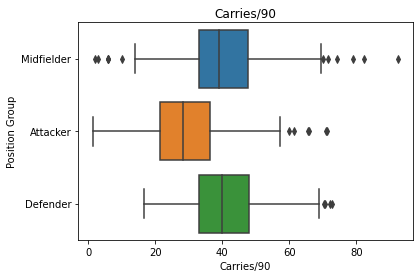

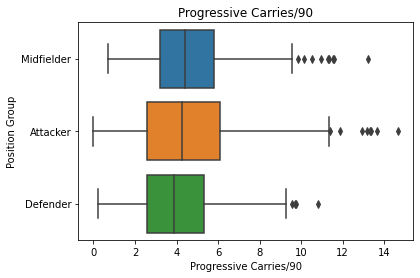

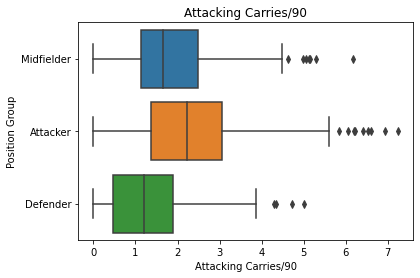

In [236]:
Subgroup_Stat_Compare(market_value_eda, carries, 'Position Group')

Here we can see that attackers complete more dribbles but have a worse percentage. They most likely get more opportunities to dribble as they are usually the best dribblers on the field. They also operate in spaces where passing is the tightest. Sometimes dribbling is the only way to create space. However, they also dribble in more difficult environments, with multiple defenders attempting to stop them. Defenders have the highest success rate for the opposite reason, nobody is trying to stop them, they are usually dribbling farther away from goal. 

#### Touches

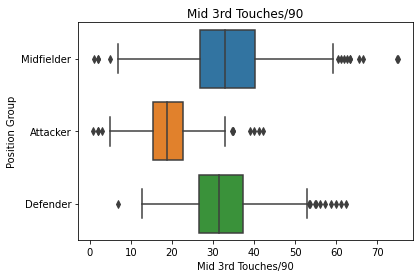

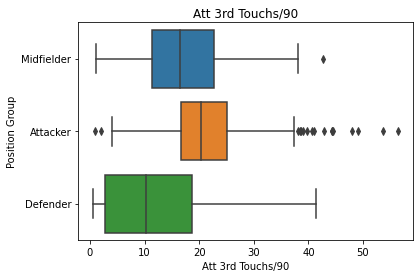

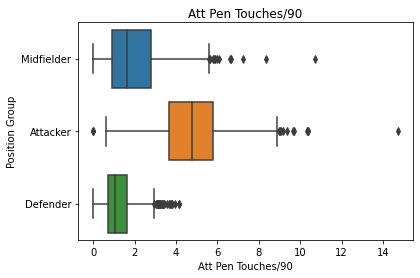

In [237]:
Subgroup_Stat_Compare(market_value_eda, touches, 'Position Group')

Midfielder touch the ball the most in the middle of the field. Attackers the most in the attacking parts of the field. This checks out. 

#### Tackles, pressing and other defensive stats
It makes sense to group these together as they are the only defensive stats in the set. 

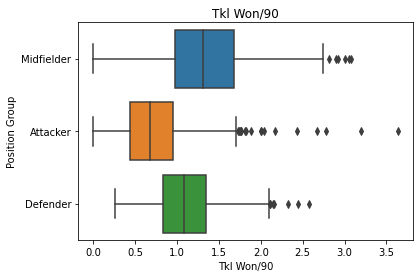

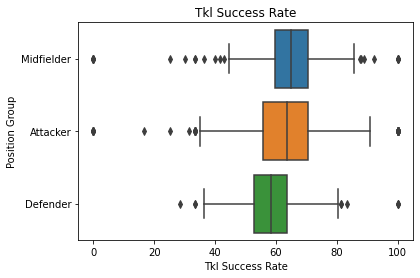

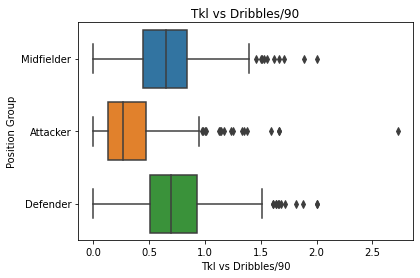

In [238]:
Subgroup_Stat_Compare(market_value_eda, tackles, 'Position Group')

It is interesting to note that most of the tackles happen in the middle of the field, not actually on the defensive side. However we see that the most dribbling happens against defenders. 

Defenders have the worst `Tkl Success Rate`, which is surprising.

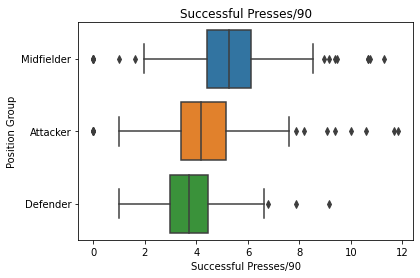

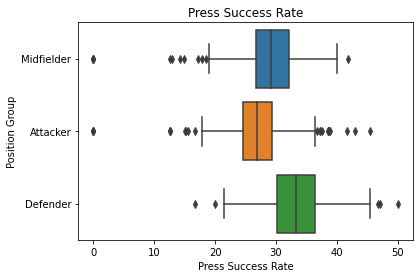

In [239]:
Subgroup_Stat_Compare(market_value_eda, pressing, 'Position Group')

The tackles stats make a little more sense. Now if midfielders are pressing the most, it would make sense that they get the most tackles. Pressing is usually done before the ball gets into your half, that way another attack can be initiated as fast as possible. 

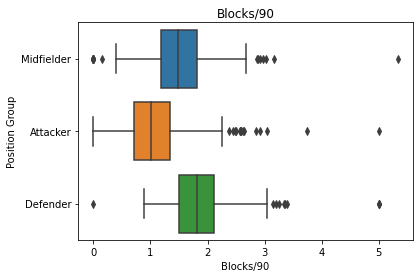

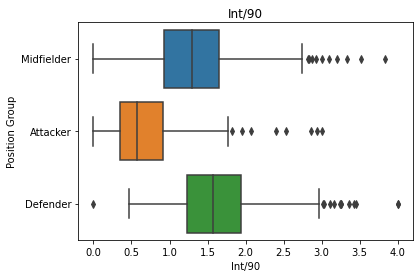

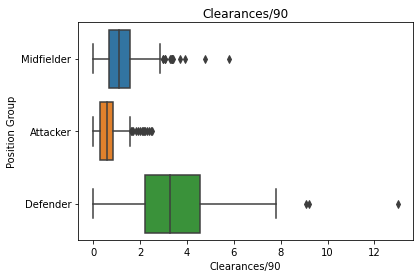

In [240]:
Subgroup_Stat_Compare(market_value_eda, other_defensive_stats, 'Position Group')

Here we see the role and value of defenders. They take the ball away and remove it from danger.

#### Fouling

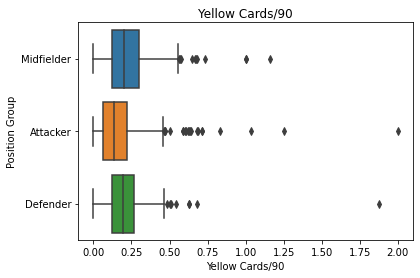

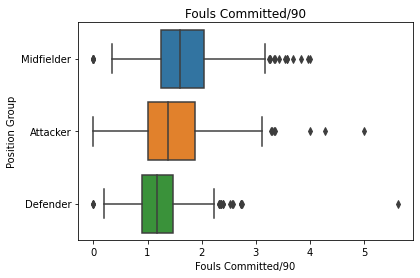

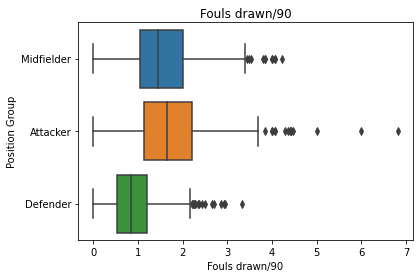

In [241]:
Subgroup_Stat_Compare(market_value_eda, fouls, 'Position Group')

It makes sense that attackers and midfielders draw the most fouls, they have the ball the most. Midfielders commit the most fouls, I'd guess going in for tackles or trying to slow attacks before it gets to dangerous. Defenders get the most yellow cards, as a player is more likely to get a yellow card the closer the play is to the goal. 

### Age

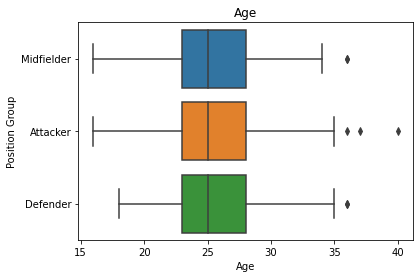

In [242]:
#creating age list
age = ['Age']
#checking plots
Subgroup_Stat_Compare(market_value_eda, age, 'Position Group')

There is no difference in age. There is a 40 year old attacker though. This will not be included in upcoming analysis. My curiosity has been satisfied

Now I will move on to examine the relationship between subgroups with `Position Groups` starting with defenders. 

## Statistical Breakdown by Defender `Position Subgroup`.

I will now perform similar analysis but with `Position Subgroups` only in the defender `Postiong Group`.

### Creating New Data Frame

In [243]:
#for reference
defender_df.columns

Index(['Name', 'League', 'Club', 'Position', 'Age', 'Nationality',
       'Market Values in Millions', '90s', 'Gls/90', 'Ast/90', 'PK/90',
       'Non PK Gls/90', 'Yellow Cards/90', 'Red Cards/90', 'xG/90',
       'non PK xG/90', 'xA/90', 'Shots/90', 'Shots on Target/90',
       'Free Kicks/90', 'Passes Cmp', 'Attempts', 'Pass Cmp/90',
       'Pass Cmp Pctg', 'Short Cmp', 'Short Att', 'Short Pass Cmp/90',
       'Short Pass Cmp Pctg', 'Medium Pass Cmp', 'Medium Pass Att',
       'Medium Pass Cmp/90', 'Medium Pass Cmp Pctg', 'Long Pass Cmp/90',
       'Long Pass Cmp Pctg', 'Attacking Passes/90',
       'Successful Box Crosses/90', 'Progressing Passes/90',
       'Through Balls/90', 'Passes under pressure/90', 'Switches/90',
       'Crosses/90', 'Bad Passes/90', 'SCA/90', 'GCA/90', 'Tkl Won/90',
       'Tkl Success Rate', 'Tkl vs Dribbles/90',
       'Tkl vs. dribbles Success Rate', 'Successful Presses/90',
       'Press Success Rate', 'Blocks/90', 'Int/90', 'Clearances/90',
       'Erro

In [244]:
#making drop list
drop_list = ['Position Group', 'Name', 'League', 
             'Club', 'Position', 'Nationality',
            'Market Values in Millions', '90s', 'Age']
#creating new data frame
defender_eda = defender_df.drop(columns=drop_list)

#checking
print(defender_eda.columns)

Index(['Gls/90', 'Ast/90', 'PK/90', 'Non PK Gls/90', 'Yellow Cards/90',
       'Red Cards/90', 'xG/90', 'non PK xG/90', 'xA/90', 'Shots/90',
       'Shots on Target/90', 'Free Kicks/90', 'Passes Cmp', 'Attempts',
       'Pass Cmp/90', 'Pass Cmp Pctg', 'Short Cmp', 'Short Att',
       'Short Pass Cmp/90', 'Short Pass Cmp Pctg', 'Medium Pass Cmp',
       'Medium Pass Att', 'Medium Pass Cmp/90', 'Medium Pass Cmp Pctg',
       'Long Pass Cmp/90', 'Long Pass Cmp Pctg', 'Attacking Passes/90',
       'Successful Box Crosses/90', 'Progressing Passes/90',
       'Through Balls/90', 'Passes under pressure/90', 'Switches/90',
       'Crosses/90', 'Bad Passes/90', 'SCA/90', 'GCA/90', 'Tkl Won/90',
       'Tkl Success Rate', 'Tkl vs Dribbles/90',
       'Tkl vs. dribbles Success Rate', 'Successful Presses/90',
       'Press Success Rate', 'Blocks/90', 'Int/90', 'Clearances/90',
       'Errors/90', 'Touches/90', 'Mid 3rd Touches/90', 'Att 3rd Touchs/90',
       'Att Pen Touches/90', 'Successful Drib

Now I am going to create lists to represent various statistical categories. These will be used for all of the following explorations. 

## Statistical Breakdowns

### Shooting Scoring

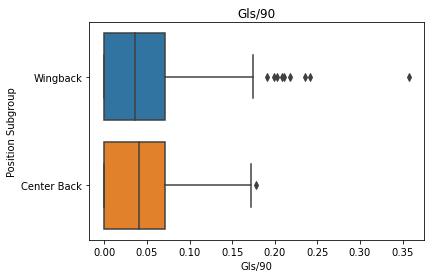

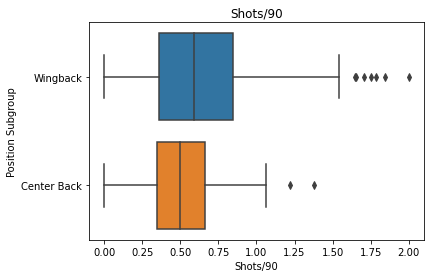

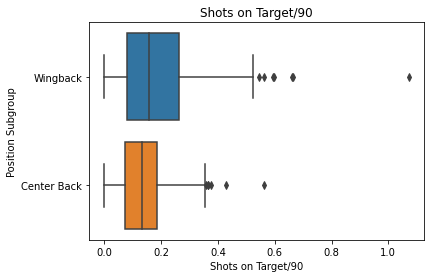

In [245]:
Subgroup_Stat_Compare(defender_eda, scoring_shooting, 'Position Subgroup')

Wingbacks shoot more often but center backs score more often, though narrowly. Center backs are frequent targets for headers on corner kicks and free kicks in attacking position, so this checks out

#### Attacking Passes

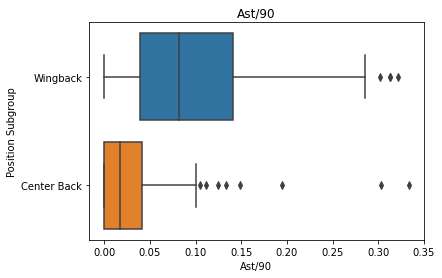

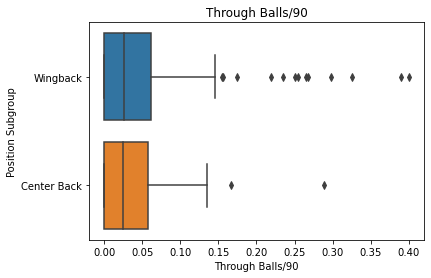

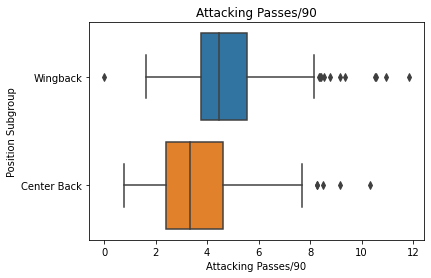

In [246]:
Subgroup_Stat_Compare(defender_eda, assists, 'Position Subgroup')

Though they play equal amounts of through balls, wingbacks are used more often in attacks. They contribute more assists, and more passes into the attacking third.

#### Passing 

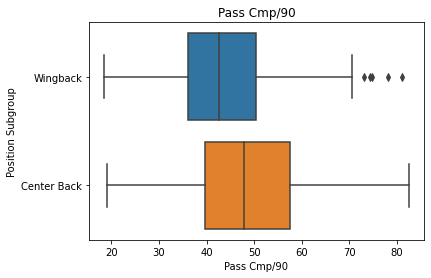

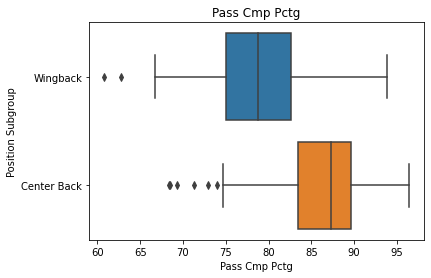

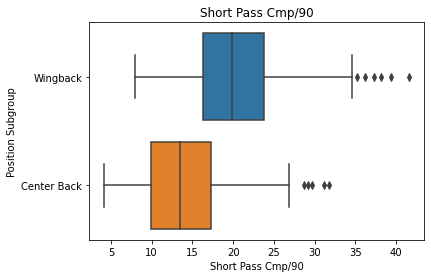

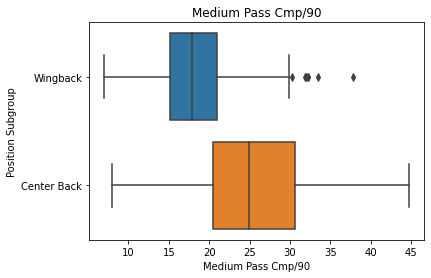

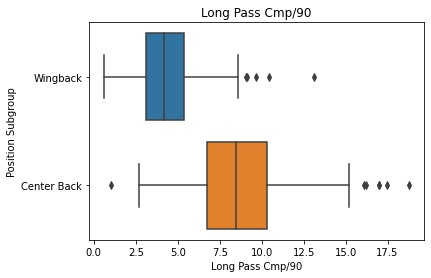

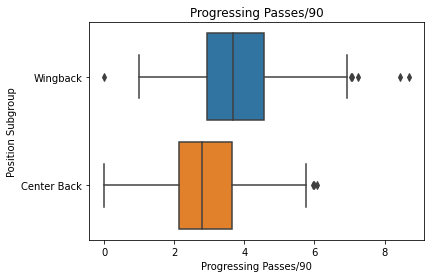

In [247]:
Subgroup_Stat_Compare(defender_eda, passing, 'Position Subgroup')

Wingbacks make more short passes but center backs make more long and medium passes. Center backs are making easier passes, that's why they're success rate is so much higher. 

#### Receiving

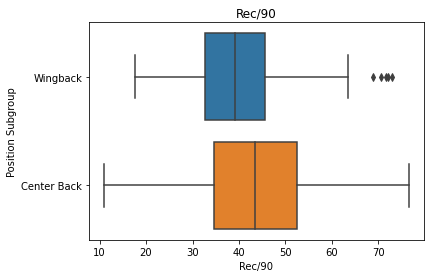

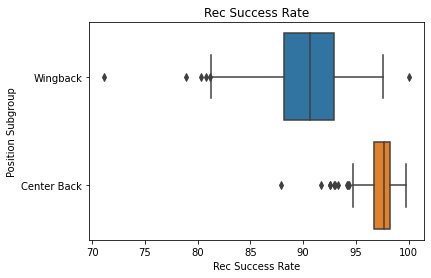

In [248]:
Subgroup_Stat_Compare(defender_eda, recieving, 'Position Subgroup')

This phenomenon is shown again with these plots. Center backs `Rec Success Rate` is crazy high. This is not because they are great with their feet, it's because the other team is not defending them. 

#### Shot/Goal Creation

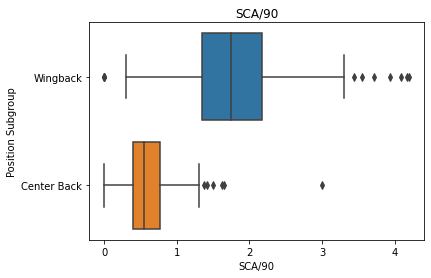

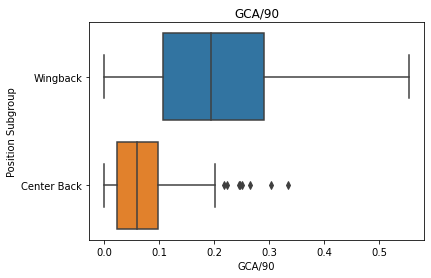

In [249]:
Subgroup_Stat_Compare(defender_eda, creation, 'Position Subgroup')

Wingbacks are apart of the offense. They help their teams create chances and goals. Center backs not so much. 

#### Crosses Switches

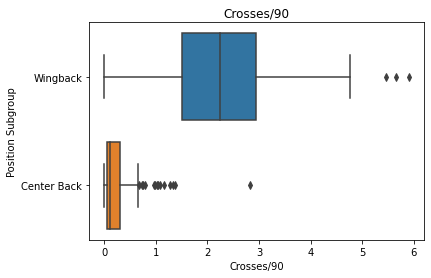

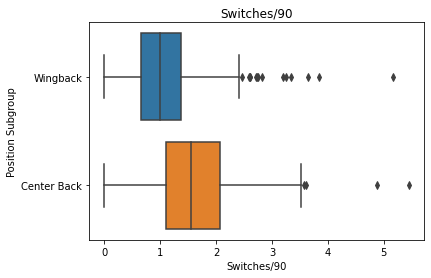

In [250]:
Subgroup_Stat_Compare(defender_eda, crosses_switches, 'Position Subgroup')

This is interesting. There is a massive gap in crosses, as wingbacks are used often to put balls into the box. However it is often center backs who are switching field to get the wingbacks and other teammates the ball out wide on the pitch

#### Aerial

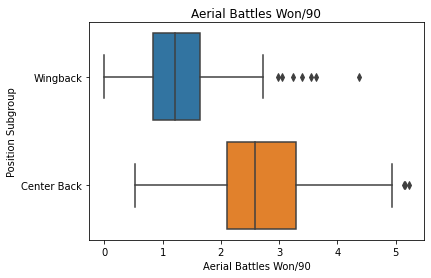

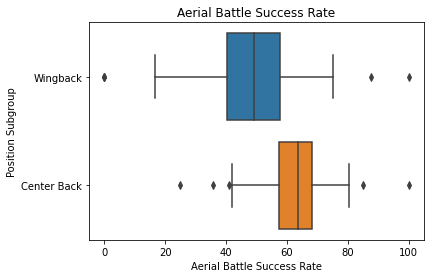

In [301]:
Subgroup_Stat_Compare(defender_eda, aerial, 'Position Subgroup')

Center backs are often the tallest and strongest players on the pitch. They are put in situations to head the ball out of goal or into goal frequently. It is impressive that they are successful so much of the time. 

#### Dribbles and Carries
These two look at how often a player has the ball at their feet, so they will be examined together.

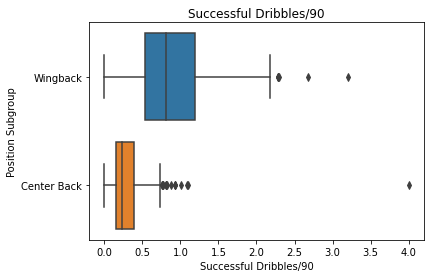

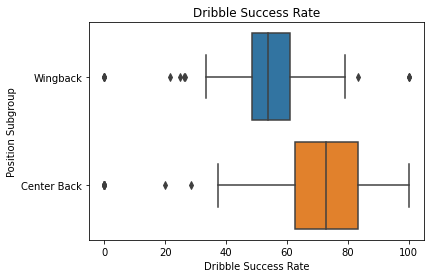

In [302]:
Subgroup_Stat_Compare(defender_eda, dribbles, 'Position Subgroup')

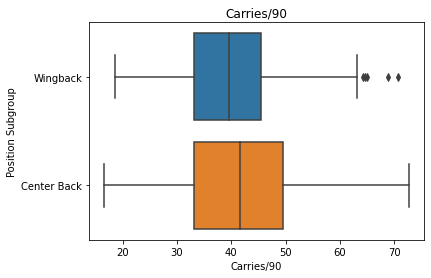

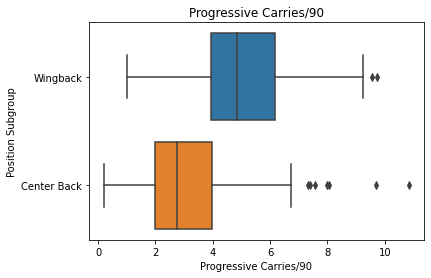

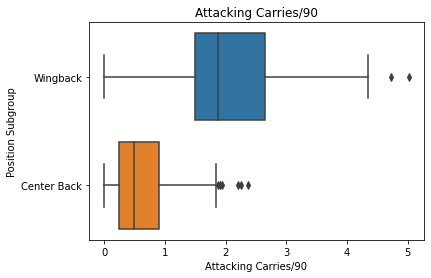

In [303]:
Subgroup_Stat_Compare(defender_eda, carries, 'Position Subgroup')

Center backs carry the ball more, usually just taking the space given to them by the defense. We can see though that wingbacks are often used to move the ball up the field and take on players more often.

#### Touches

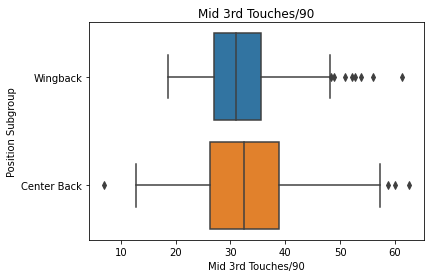

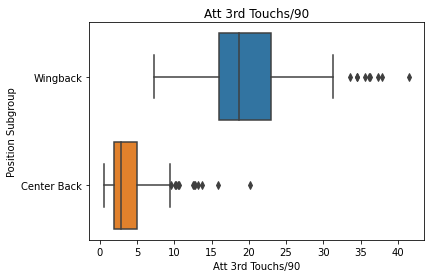

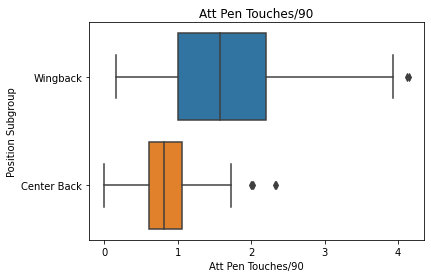

In [304]:
Subgroup_Stat_Compare(defender_eda, touches, 'Position Subgroup')

The subgroups are used equal in the middle third of the field, but wingbacks get the ball in attacking areas much more often.

#### Tackles, pressing and other defensive stats
It makes sense to group these together as they are the only defensive stats in the set. 

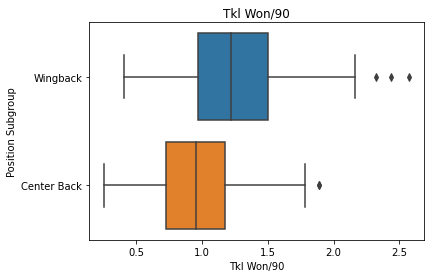

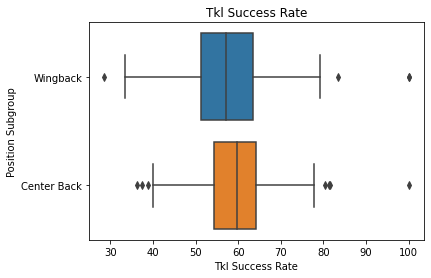

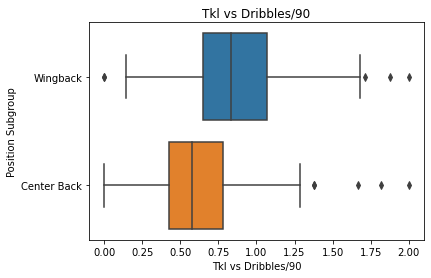

In [305]:
Subgroup_Stat_Compare(defender_eda, tackles, 'Position Subgroup')

Wingbacks get challenged more often. Wingers, who wingbacks are tasked to defend, are put on the wings because they are good dribblers. Working out wide gives them the most space. Therefore, wingers get challenged more often and make more tackles.

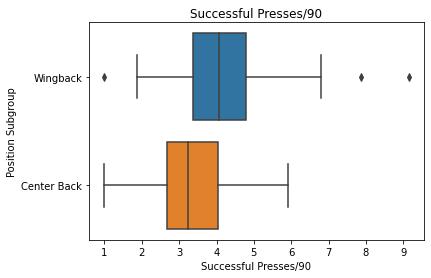

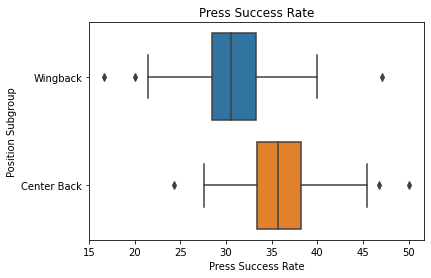

In [306]:
Subgroup_Stat_Compare(defender_eda, pressing, 'Position Subgroup')

Because wingbacks are higher up the field more frequently, they get more opportunities to press. However, center backs have more success when pressuring the ball. 

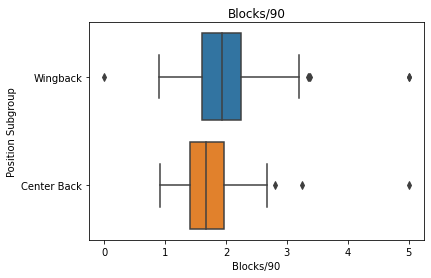

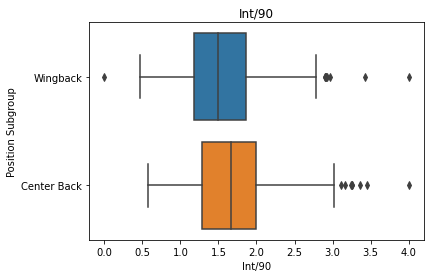

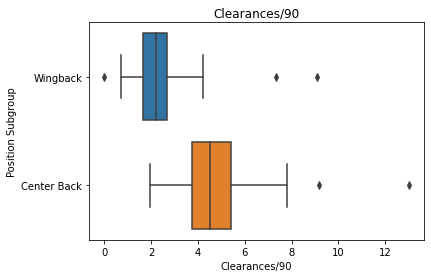

In [307]:
Subgroup_Stat_Compare(defender_eda, other_defensive_stats, 'Position Subgroup')

Wingbacks get more blocks, likely on crosses. Defenders intercept and clear out more passes. They challenge more balls closer to the net. 

#### Fouling

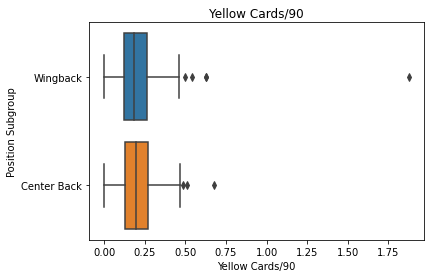

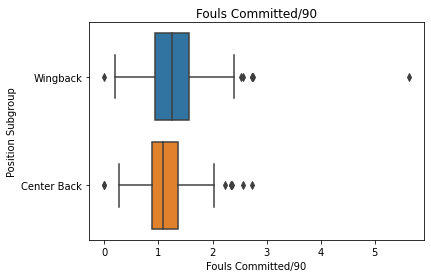

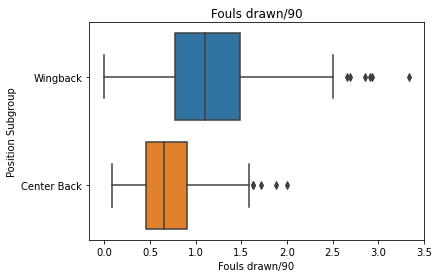

In [308]:
Subgroup_Stat_Compare(defender_eda, fouls, 'Position Subgroup')

They foul at equal rates, but again we see that because wingbacks have the ball more often, they get fouled more. 

The main takeaway here is how much more involved in the attack wingbacks are than center backs. Centerbacks are charged with keeping the ball away from their net. Wingbacks try to keep balls and players out of the middle of the field, while trying to accomplish the same on their opponents side. 

## Statistical Breakdown by Midfielder `Position Subgroup`.

I will now perform similar analysis but with `Position Subgroups` only in the midfielder `Position Group`.

### Creating New Data Frame

In [309]:
#for reference
midfielder_df.columns

Index(['Name', 'League', 'Club', 'Position', 'Age', 'Nationality',
       'Market Values in Millions', '90s', 'Gls/90', 'Ast/90', 'PK/90',
       'Non PK Gls/90', 'Yellow Cards/90', 'Red Cards/90', 'xG/90',
       'non PK xG/90', 'xA/90', 'Shots/90', 'Shots on Target/90',
       'Free Kicks/90', 'Pass Cmp/90', 'Pass Cmp Pctg', 'Short Pass Cmp/90',
       'Short Pass Cmp Pctg', 'Medium Pass Cmp/90', 'Medium Pass Cmp Pctg',
       'Long Pass Cmp/90', 'Long Pass Cmp Pctg', 'Attacking Passes/90',
       'Successful Box Crosses/90', 'Progressing Passes/90',
       'Through Balls/90', 'Passes under pressure/90', 'Switches/90',
       'Crosses/90', 'Bad Passes/90', 'SCA/90', 'GCA/90', 'Tkl Won/90',
       'Tkl Success Rate', 'Tkl vs Dribbles/90',
       'Tkl vs. dribbles Success Rate', 'Successful Presses/90',
       'Press Success Rate', 'Blocks/90', 'Int/90', 'Clearances/90',
       'Errors/90', 'Touches/90', 'Mid 3rd Touches/90', 'Att 3rd Touchs/90',
       'Att Pen Touches/90', 'Successfu

In [310]:
#making drop list
drop_list = ['Position Group', 'Name', 'League', 
             'Club', 'Position', 'Nationality',
            'Market Values in Millions', '90s', 'Age']
#creating new data frame
midfielder_eda = midfielder_df.drop(columns=drop_list)

#checking
print(midfielder_eda.columns)

Index(['Gls/90', 'Ast/90', 'PK/90', 'Non PK Gls/90', 'Yellow Cards/90',
       'Red Cards/90', 'xG/90', 'non PK xG/90', 'xA/90', 'Shots/90',
       'Shots on Target/90', 'Free Kicks/90', 'Pass Cmp/90', 'Pass Cmp Pctg',
       'Short Pass Cmp/90', 'Short Pass Cmp Pctg', 'Medium Pass Cmp/90',
       'Medium Pass Cmp Pctg', 'Long Pass Cmp/90', 'Long Pass Cmp Pctg',
       'Attacking Passes/90', 'Successful Box Crosses/90',
       'Progressing Passes/90', 'Through Balls/90', 'Passes under pressure/90',
       'Switches/90', 'Crosses/90', 'Bad Passes/90', 'SCA/90', 'GCA/90',
       'Tkl Won/90', 'Tkl Success Rate', 'Tkl vs Dribbles/90',
       'Tkl vs. dribbles Success Rate', 'Successful Presses/90',
       'Press Success Rate', 'Blocks/90', 'Int/90', 'Clearances/90',
       'Errors/90', 'Touches/90', 'Mid 3rd Touches/90', 'Att 3rd Touchs/90',
       'Att Pen Touches/90', 'Successful Dribbles/90', 'Dribble Success Rate',
       'Carries/90', 'Progressive Carries/90', 'Attacking Carries/90',

Now I am going to create lists to represent various statistical categories. These will be used for all of the following explorations. 

### Statistical Breakdowns

#### Shooting Scoring

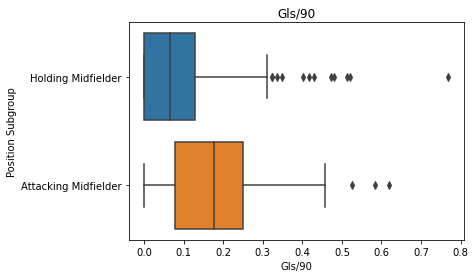

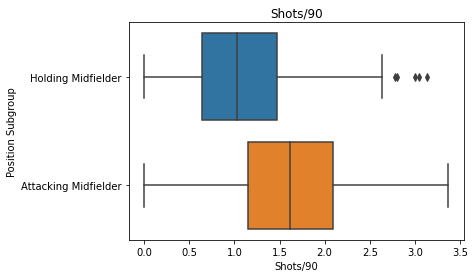

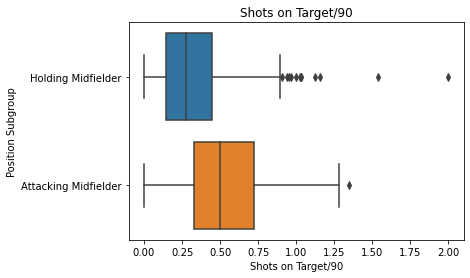

In [311]:
Subgroup_Stat_Compare(midfielder_eda, scoring_shooting, 'Position Subgroup')

Attacking midfielders attack, they get more goals and shots than their holding counter parts.

#### Attacking Passes

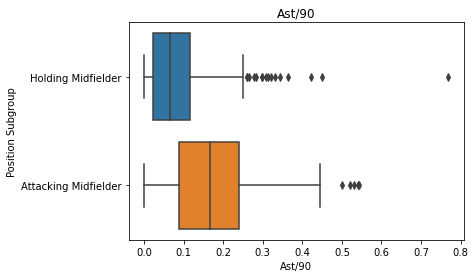

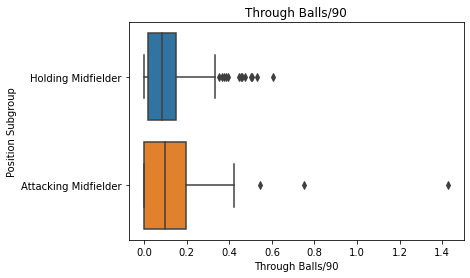

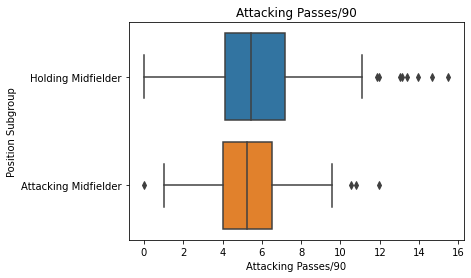

In [312]:
Subgroup_Stat_Compare(midfielder_eda, assists, 'Position Subgroup')

Attacking midfielders get more `Assists/90`, but they generate equal amounts of `Through Balls/90` and `Attacking Passes/90`. The two subgroups make the same amount of dangerous passes, just at different parts of the pitch.

#### Passing 

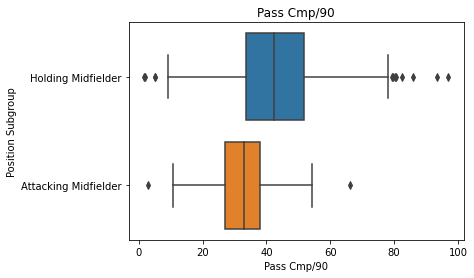

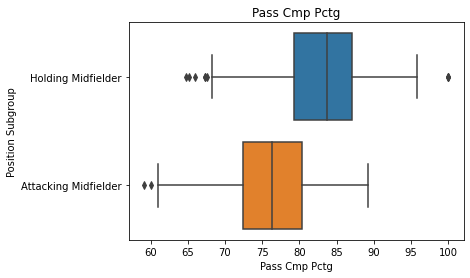

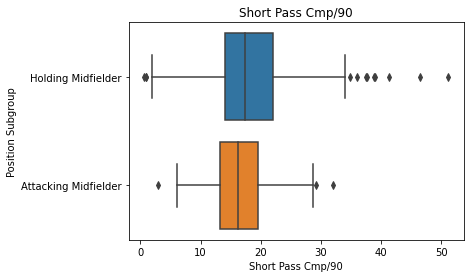

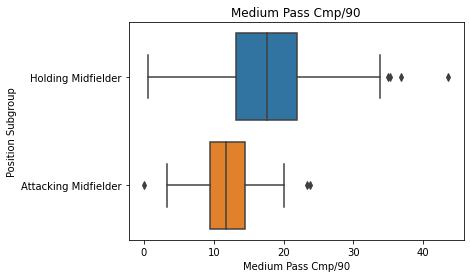

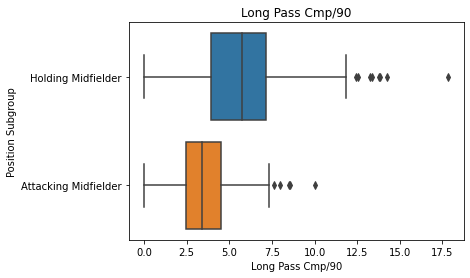

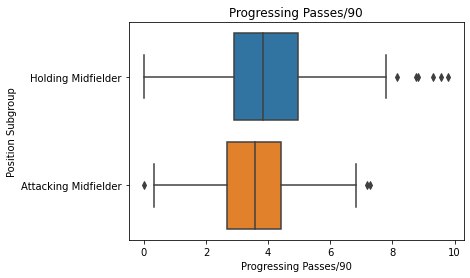

In [313]:
Subgroup_Stat_Compare(midfielder_eda, passing, 'Position Subgroup')

Holding midfielders have better passing stats across the board. They make easier passes, as they are positioned farther away from the goal, but they are also charged with holding onto possession and you can see that they are often successful.

#### Receiving

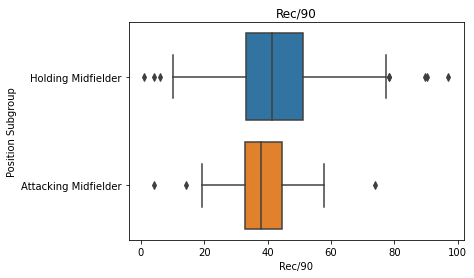

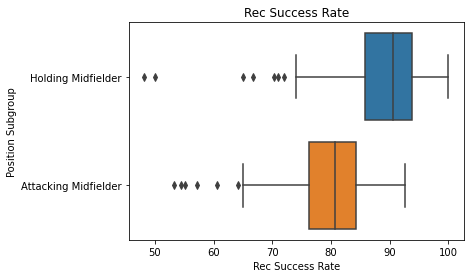

In [314]:
Subgroup_Stat_Compare(midfielder_eda, recieving, 'Position Subgroup')

They get similar `Rec/90` statistics, but holding midfielders have a much better `Rec Success Rate`. Again, this is because they are often playing farther away from the goal. 

#### Shot/Goal Creation

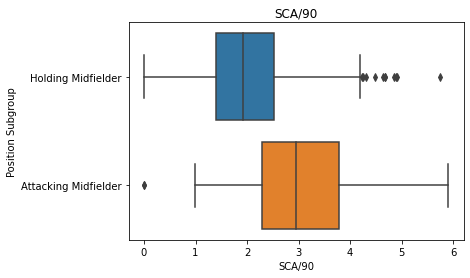

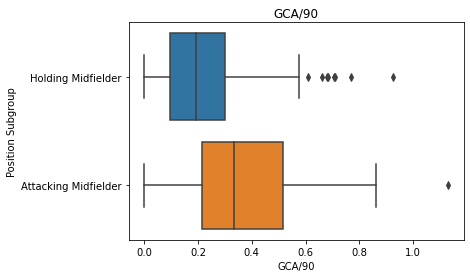

In [315]:
Subgroup_Stat_Compare(midfielder_eda, creation, 'Position Subgroup')

Again we see that is the attacking midfielder responsibility to create chances for their team. 

#### Crosses Switches

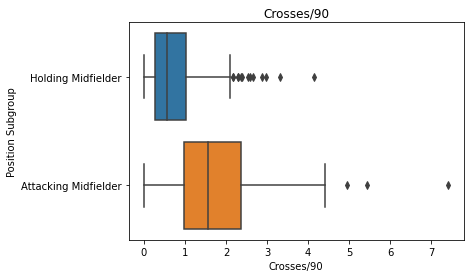

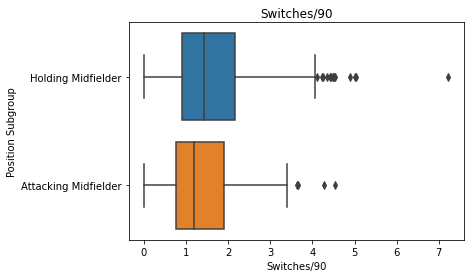

In [316]:
Subgroup_Stat_Compare(midfielder_eda, crosses_switches, 'Position Subgroup')

There is a  gap in crosses, as some attacking midfielders play out wide. But again we see that the players farther back are often responsible for gettign the ball in that position.

#### Aerial

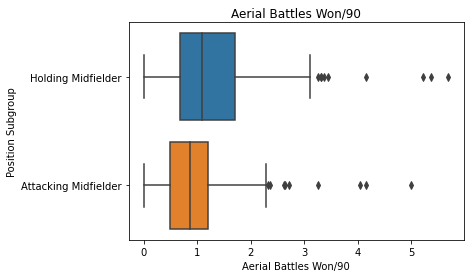

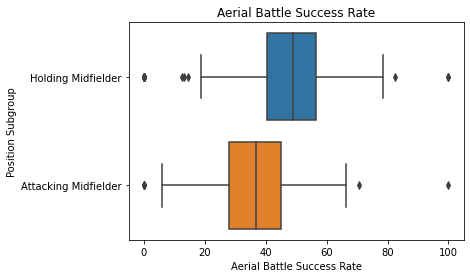

In [317]:
Subgroup_Stat_Compare(midfielder_eda, aerial, 'Position Subgroup')

Holding midfielders get more opportunities and are better at it. This also is not a super important skill for midfielders, but attacking players are often more skill and less strength.

#### Dribbles and Carries
These two look at how often a player has the ball at their feet, so they will be examined together.

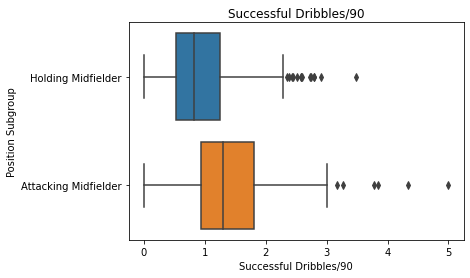

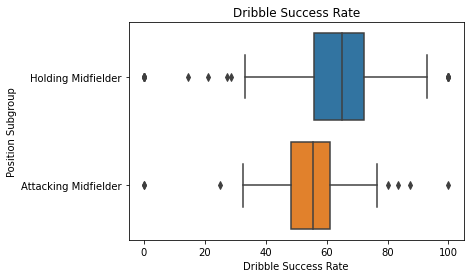

In [318]:
Subgroup_Stat_Compare(midfielder_eda, dribbles, 'Position Subgroup')

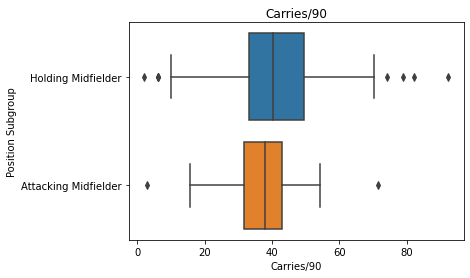

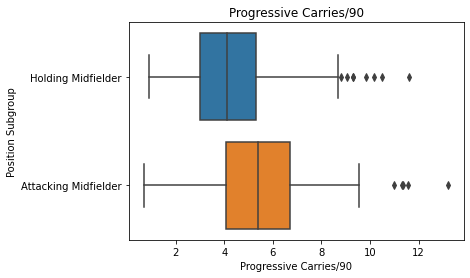

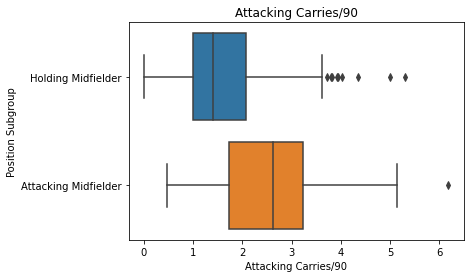

In [319]:
Subgroup_Stat_Compare(midfielder_eda, carries, 'Position Subgroup')

Similar to defenders, the higher up the field you play, the harder it is to dribble and carry the ball.

#### Touches

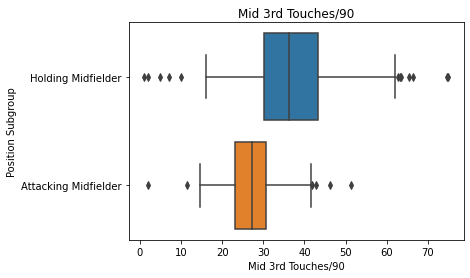

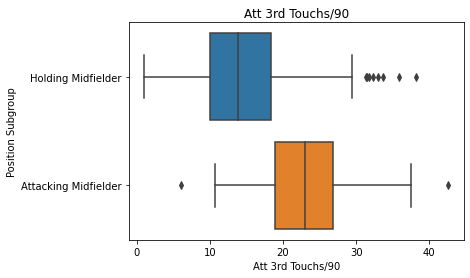

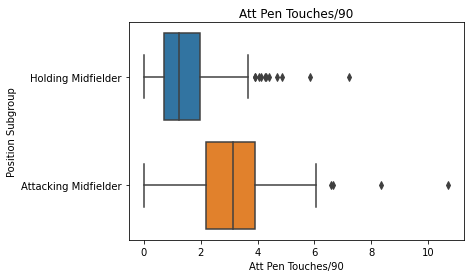

In [320]:
Subgroup_Stat_Compare(midfielder_eda, touches, 'Position Subgroup')

Holding midfielders are hubs in the middle of the field, and attacking midfielders play the same role higher up the pitch.

#### Tackles, pressing and other defensive stats
It makes sense to group these together as they are the only defensive stats in the set. 

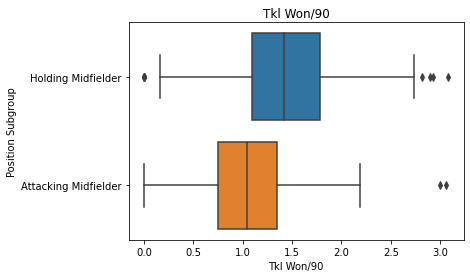

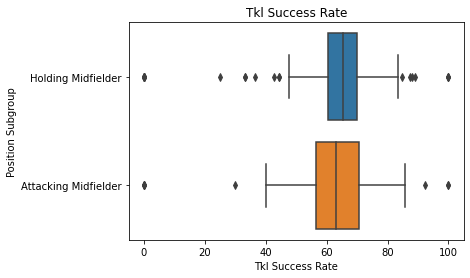

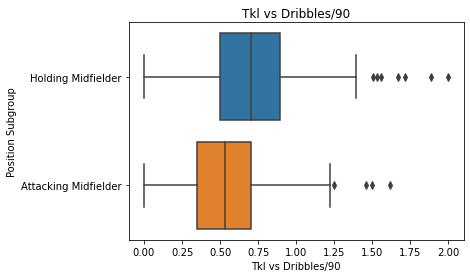

In [321]:
Subgroup_Stat_Compare(midfielder_eda, tackles, 'Position Subgroup')

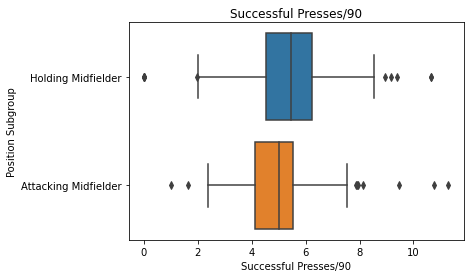

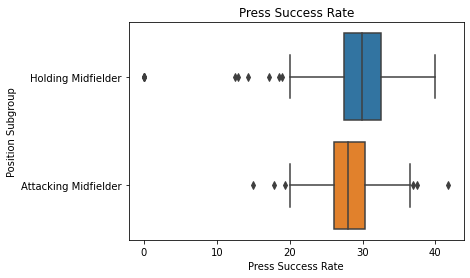

In [322]:
Subgroup_Stat_Compare(midfielder_eda, pressing, 'Position Subgroup')

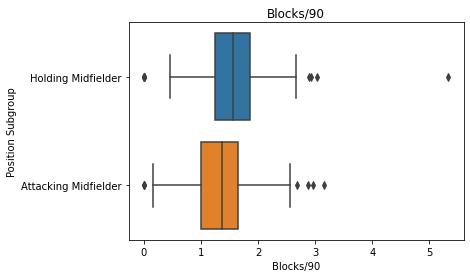

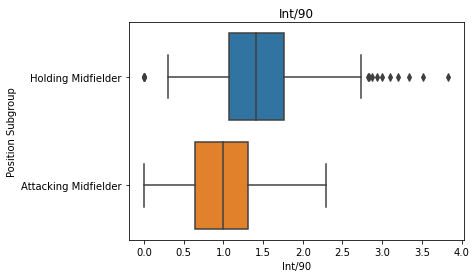

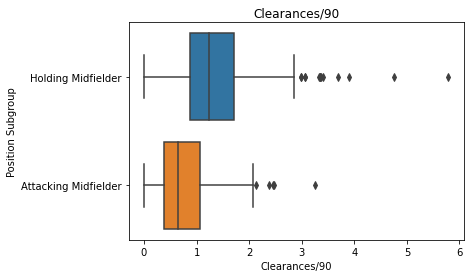

In [323]:
Subgroup_Stat_Compare(midfielder_eda, other_defensive_stats, 'Position Subgroup')

Holding midfielders who can get the ball back for your team and turn it into offense are extremely important. It makes sense that they have stronger defensive stats across the board.

#### Fouling

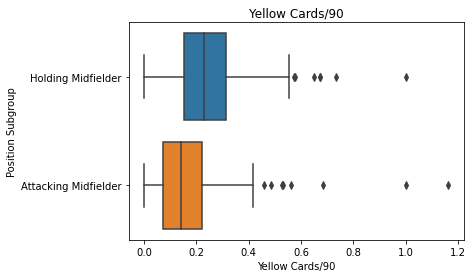

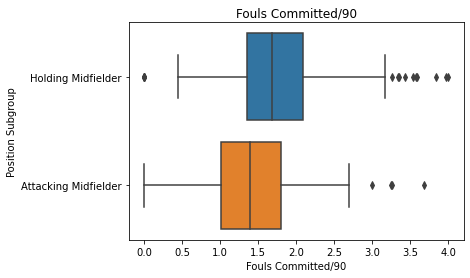

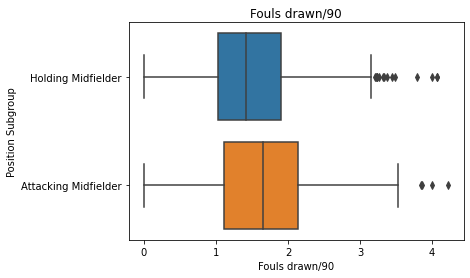

In [324]:
Subgroup_Stat_Compare(midfielder_eda, fouls, 'Position Subgroup')

As holding midfielders tackle more, they also foul more. Attacking midfielders have the ball more so they get fouled more.

Again we see the roles change as players are positioned up the pitch. These players often play similar roles, more similar than wingbacks and center backs, but just do it at different parts of the field. 

## Statistical Breakdown by Attacker `Position Subgroup`.

I will now perform similar analysis but with `Position Subgroups` only in the midfielder `Position Group`.

### Creating New Data Frame

In [325]:
#for reference
attacker_df.columns

Index(['Name', 'League', 'Club', 'Position', 'Age', 'Nationality',
       'Market Values in Millions', '90s', 'Gls/90', 'Ast/90', 'PK/90',
       'Non PK Gls/90', 'Yellow Cards/90', 'Red Cards/90', 'xG/90',
       'non PK xG/90', 'xA/90', 'Shots/90', 'Shots on Target/90',
       'Free Kicks/90', 'Pass Cmp/90', 'Pass Cmp Pctg', 'Short Pass Cmp/90',
       'Short Pass Cmp Pctg', 'Medium Pass Cmp/90', 'Medium Pass Cmp Pctg',
       'Long Pass Cmp/90', 'Long Pass Cmp Pctg', 'Attacking Passes/90',
       'Successful Box Crosses/90', 'Progressing Passes/90',
       'Through Balls/90', 'Passes under pressure/90', 'Switches/90',
       'Crosses/90', 'Bad Passes/90', 'SCA/90', 'GCA/90', 'Tkl Won/90',
       'Tkl Success Rate', 'Tkl vs Dribbles/90',
       'Tkl vs. dribbles Success Rate', 'Successful Presses/90',
       'Press Success Rate', 'Blocks/90', 'Int/90', 'Clearances/90',
       'Errors/90', 'Touches/90', 'Mid 3rd Touches/90', 'Att 3rd Touchs/90',
       'Att Pen Touches/90', 'Successfu

In [326]:
#making drop list
drop_list = ['Position Group', 'Name', 'League', 
             'Club', 'Position', 'Nationality',
            'Market Values in Millions', '90s', 'Age']
#creating new data frame
attacker_eda = attacker_df.drop(columns=drop_list)

#checking
print(attacker_eda.columns)

Index(['Gls/90', 'Ast/90', 'PK/90', 'Non PK Gls/90', 'Yellow Cards/90',
       'Red Cards/90', 'xG/90', 'non PK xG/90', 'xA/90', 'Shots/90',
       'Shots on Target/90', 'Free Kicks/90', 'Pass Cmp/90', 'Pass Cmp Pctg',
       'Short Pass Cmp/90', 'Short Pass Cmp Pctg', 'Medium Pass Cmp/90',
       'Medium Pass Cmp Pctg', 'Long Pass Cmp/90', 'Long Pass Cmp Pctg',
       'Attacking Passes/90', 'Successful Box Crosses/90',
       'Progressing Passes/90', 'Through Balls/90', 'Passes under pressure/90',
       'Switches/90', 'Crosses/90', 'Bad Passes/90', 'SCA/90', 'GCA/90',
       'Tkl Won/90', 'Tkl Success Rate', 'Tkl vs Dribbles/90',
       'Tkl vs. dribbles Success Rate', 'Successful Presses/90',
       'Press Success Rate', 'Blocks/90', 'Int/90', 'Clearances/90',
       'Errors/90', 'Touches/90', 'Mid 3rd Touches/90', 'Att 3rd Touchs/90',
       'Att Pen Touches/90', 'Successful Dribbles/90', 'Dribble Success Rate',
       'Carries/90', 'Progressive Carries/90', 'Attacking Carries/90',

Now I am going to create lists to represent various statistical categories. These will be used for all of the following explorations. 

## Statistical Breakdowns

### Shooting Scoring

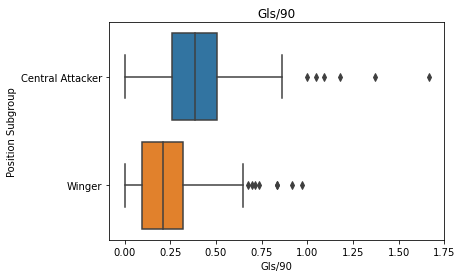

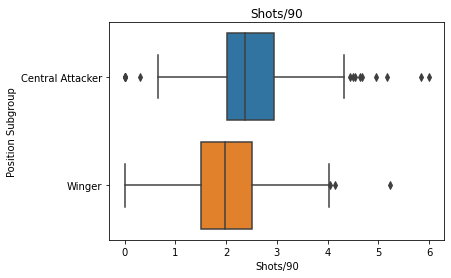

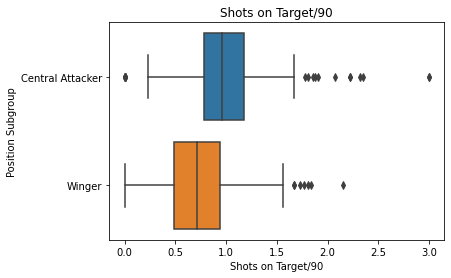

In [327]:
Subgroup_Stat_Compare(attacker_eda, scoring_shooting, 'Position Subgroup')

Central attackers score more goals than their winger counter parts.

#### Attacking Passes

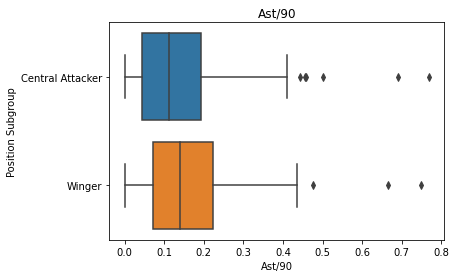

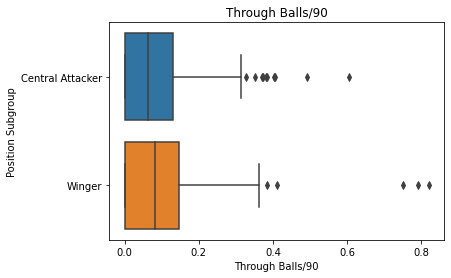

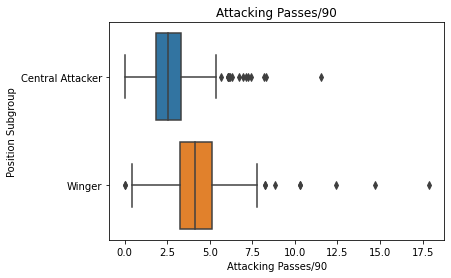

In [328]:
Subgroup_Stat_Compare(attacker_eda, assists, 'Position Subgroup')

Here we see that the actual amount of dangerous passes are much closer in shape than total number of passes. This is shown by looking at the Attacking Passes/90 plot, which just measures the amount of passes made in the attacking third, and not the whether or not these passes created actual chances.

#### Passing 

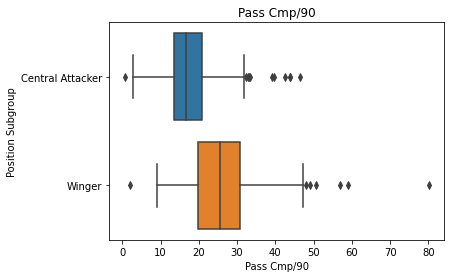

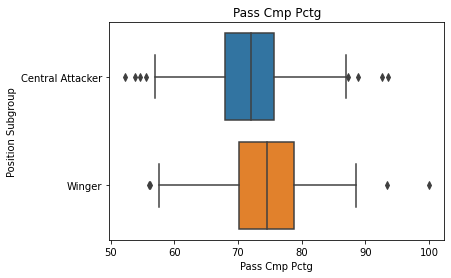

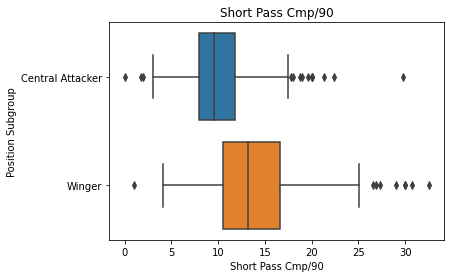

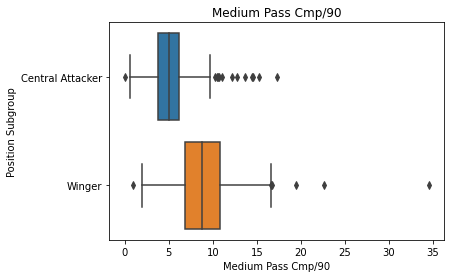

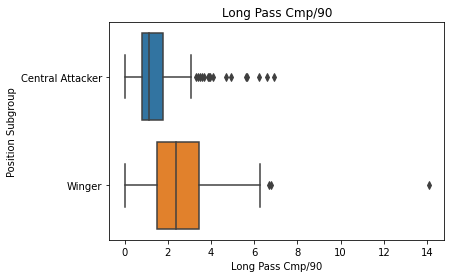

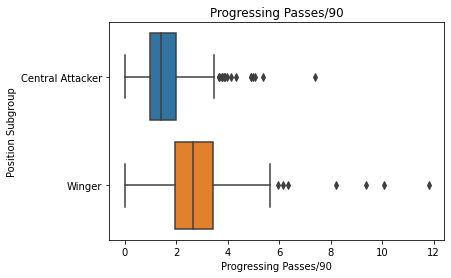

In [329]:
Subgroup_Stat_Compare(attacker_eda, passing, 'Position Subgroup')

Wingers pass more, and in general have a higher passing completion percentage (save long passes) than central attackers. Now I am going to look at passes received.

#### Receiving

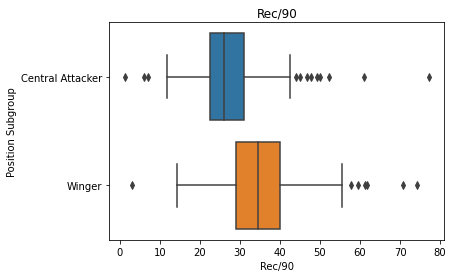

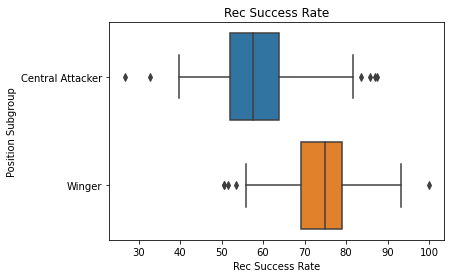

In [330]:
Subgroup_Stat_Compare(attacker_eda, recieving, 'Position Subgroup')

Wingers also receive more passes and at a higher percentage. The above two sections make sense, as teams do not want central attackers to easily receive passes, they'd rather have passes go out wide where scoring angles are less dangerous.

#### Shot/Goal Creation

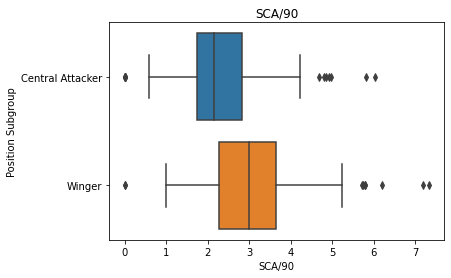

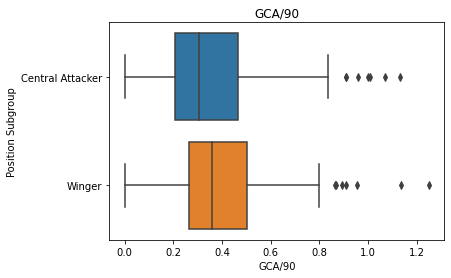

In [331]:
Subgroup_Stat_Compare(attacker_eda, creation, 'Position Subgroup')

It is important to note that these actions exclude shots and goals, just actions that lead to them. All of the plots above show that wingers are more responsible for creating scoring opportunities, and central attackers are more involved in finishing or those opportunities.

#### Crosses Switches

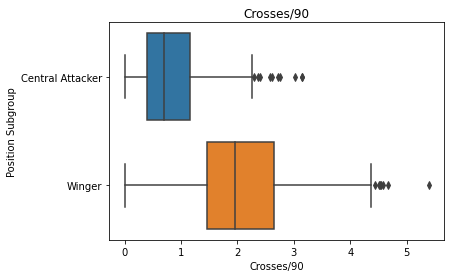

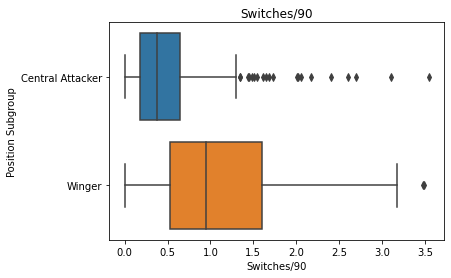

In [332]:
Subgroup_Stat_Compare(attacker_eda, crosses_switches, 'Position Subgroup')

No suprise here. Crosses are passes made from the wings into the box. Central attackers do not make crosses, but receive them, often from a winger. This is illustrated in the plot below. Central attackers win more aerial battles than wingers. 
Neither switch that often, but wingers switch a lot more frequently than central attackers. This is probably a combination of space and mentality. It's easier to switch, but also central attackers want to attack the goal when they get the ball. 

#### Aerial

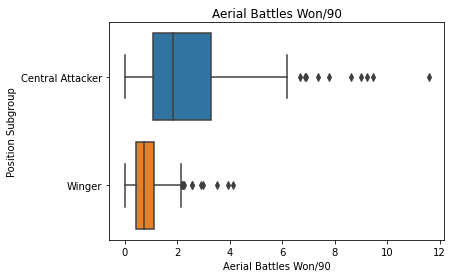

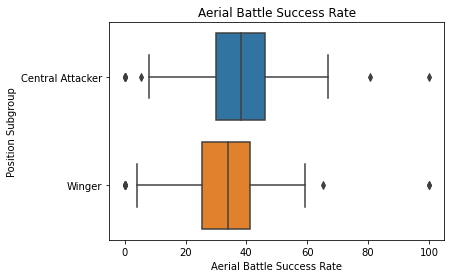

In [333]:
Subgroup_Stat_Compare(attacker_eda, aerial, 'Position Subgroup')

Central attackers are better at heading the ball. They get more opportunities and are successful more often.

#### Dribbles and Carries
These two look at how often a player has the ball at their feet, so they will be examined together.

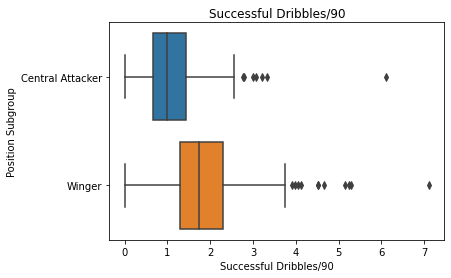

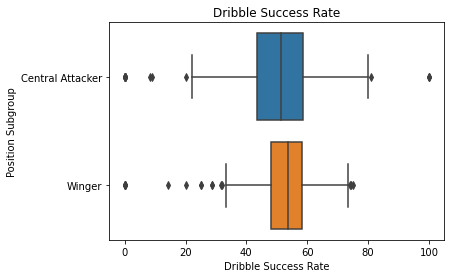

In [334]:
Subgroup_Stat_Compare(attacker_eda, dribbles, 'Position Subgroup')

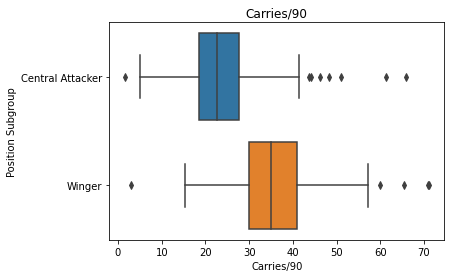

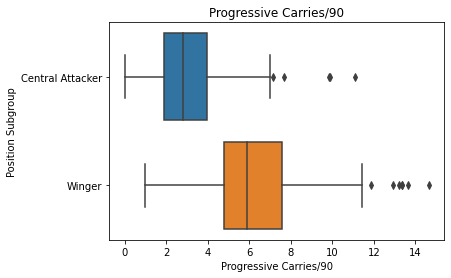

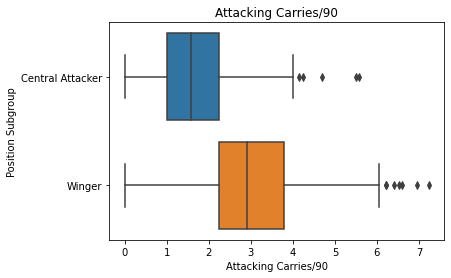

In [335]:
Subgroup_Stat_Compare(attacker_eda, carries, 'Position Subgroup')

Here we can see that wingers have the ball more often than strikers. Their `dribble success rates` are similar which shows two things. 

1. Strikers are good with the ball at their feet as well, and
2. In sports, often higher volume and lower efficiency work hand in hand. When a player increase how much they do something, they are often worse at it, as this means they are attempting that skill, in this case dribbling in more difficult situations. The fact that wings have a higher success rate and attempt more dribbles is notable.  

#### Touches

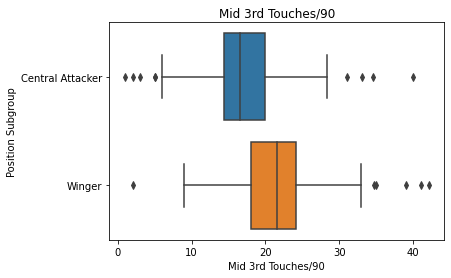

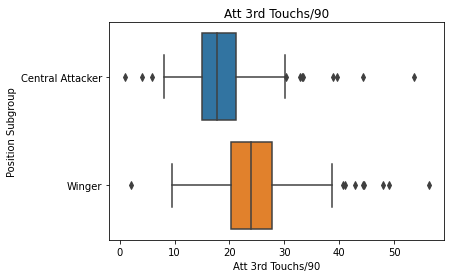

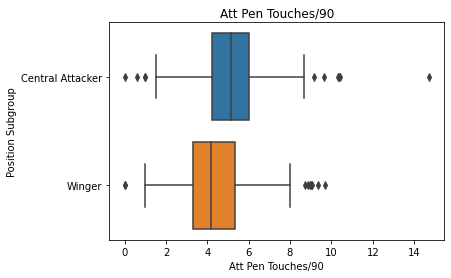

In [336]:
Subgroup_Stat_Compare(attacker_eda, touches, 'Position Subgroup')

Wingers touch the ball more often, but central attackers are often the targets inside the penalty area. 

#### Tackles, pressing and other defensive stats
I am not concerned with defensive stats for attacking players.

#### Fouling

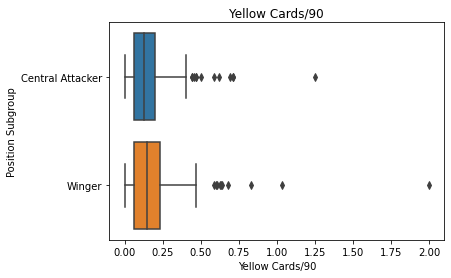

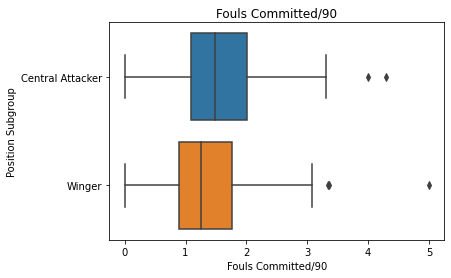

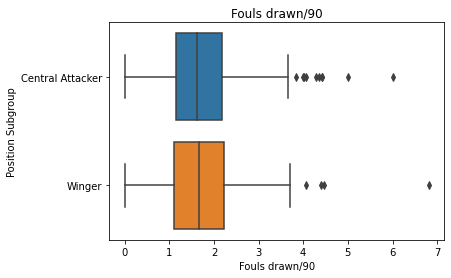

In [337]:
Subgroup_Stat_Compare(attacker_eda, fouls, 'Position Subgroup')

**Central attackers** and **wingers** are essentially equal when it comes to fouling statistics. 

Again we see the roles change as players are positioned up the pitch. These players often play similar roles, more similar than wingbacks and center backs, but just do it at different parts of the field. 

# Conclusion
There is major skew in market values. Elite players are few and far between, and so are their high market values. I found only two significant differences in this notebook. Between the Premier League and everybody else, and between centers backs and wingbacks. Only the latter pertains to the next notebook. I am not going to rehash everything discovered in section 3 of this notebook, but is worth noting how different players roles are as you move up the pitch. 

In the next notebook, I will model the data analyzed here. Some of the data will be modeled again, but most of it will be referenced. This analysis will help inform the models created in the upcoming notebook. 